In [80]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import os
import numpy as np
import datetime
import re
import keras
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import Dot, LSTM, Bidirectional, Reshape,Flatten
#from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Conv1D

#pip install keras_nlp
#from keras_nlp.layers import PositionEmbedding

import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [82]:
# This notebook shall train ML model for predicting resolution of alerts.
# ML model used are SVM , RF, XG Boost

In [83]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("comb_data_ind_final3")
df = mydataset.get_dataframe()

# Feature -1 (DOB)

In [201]:
#mydataset = dataiku.Dataset("df_dob_results")
#df_dob_results = mydataset.get_dataframe()

folder_path=dataiku.Folder("Name Screening notebooks").get_path()
path_of_csv=os.path.join(folder_path,"DOB_results.csv")
df_dob=pd.read_csv(path_of_csv)

In [202]:
try :
    df_dob.drop("Unnamed: 0",axis=1,inplace=True)
except:
    df_dob

In [86]:
#df_final=df[["Index","V_UCIF_ID","N_WATCHLIST_PROFILE_ID","N_PARTY_WATCHLIST_MATCH_ID","D_CREATED_DTM"]].merge(df_dob_results_1,how='inner',on="Index")

In [203]:
df_dob

V_UCIF_ID  N_WATCHLIST_PROFILE_ID  N_PARTY_WATCHLIST_MATCH_ID        D_CREATED_DTM                                    V_CUST_DOB                   V_DOB V_DOB_2 V_WATCHLIST_DOB_2                V_IC_DOB                                         V_COMMENTS V_RESOLUTION  FINAL_DOB_MATCH  DOB_MATCH_1  DOB_MATCH_2  DOB_MATCH_3  DOB_MATCH_4
0       144414189                 4744018                     1087675  2020-09-07 23:51:55  [['1956', '10', '09'], ['1956', '10', '09']]  [['1956', '05', '15']]    [[]]              [[]]  [['1956', '05', '15']]                          Mismatch ID number_NRIC\n           FP              0.6         -1.0          0.6          0.6         -1.0
1        55620697                 4744620                      613373  2020-09-07 12:55:53                                          [[]]  [['1958', '10', '22']]    [[]]              [[]]  [['1958', '10', '22']]                                                NaN           TH             -1.0         -1.0         -1.0         -1.0         -1.0
2        29392926                 4745480                      468202  2020-09-07 09:40:57  [['1982', '02', '20'], ['1982', '02', '20']]                    [[]]    [[]]              [[]]  [['1982', '02', '20']]                                                NaN           TH              1.0         -1.0         -1.0          1.0         -1.0
3        46555700                 4745566                      564574  2020-09-07 11:52:24  [['1978', '04', '16'], ['1978', '04', '16']]                    [[]]    [[]]              [[]]  [['1965', '07', '05']]                            Mismatch ID number_NRIC           FP              0.0         -1.0         -1.0          0.0         -1.0
4        60519764                 4745566                      640675  2020-09-07 13:33:04  [['1948', '10', '30'], ['1948', '10', '30']]                    [[]]    [[]]              [[]]  [['1965', '07', '05']]                            Mismatch ID Number_NRIC           FP              0.0         -1.0         -1.0          0.0         -1.0
...           ...                     ...                         ...                  ...                                           ...                     ...     ...               ...                     ...                                                ...          ...              ...          ...          ...          ...          ...
701176   73564041                15297593                     7565857  2023-07-17 21:54:42                        [['1982', '09', '07']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Full Legal Name – Name Does Not Sound...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701177  165957449                15297593                     7565813  2023-07-17 21:54:23                        [['1991', '09', '21']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Father's Name - Difference in Father'...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701178  171460014                15297593                     7565831  2023-07-17 21:54:23                        [['1999', '11', '24']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Father's Name - Difference in Father'...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701179   52438134                15301291                     7565871  2023-07-17 21:55:01                        [['1986', '06', '27']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Full Legal Name_Name Does Not Sound S...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701180  170924898                15305333                     7570204  2023-07-18 21:51:44                        [['1999', '08', '10']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Ful

# Feature-2 (Gender)

In [192]:
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
csv_import=os.path.join(folder_path,"Gender_similarity_scores.csv")
df_gender = pd.read_csv(csv_import)

In [193]:
try:
    df_gender.drop("Unnamed: 0",axis=1,inplace=True)
except:
    df_gender    

In [194]:
df_gender

N_WATCHLIST_PROFILE_ID  V_UCIF_ID  N_PARTY_WATCHLIST_MATCH_ID V_GENDER V_WL_GENDER  Gender_Match_Score V_RESOLUTION                                         V_COMMENTS
0                      4744018  144414189                     1087675        M           M                   1           FP                          Mismatch ID number_NRIC\n
1                      4744620   55620697                      613373      NaN           M                  -1           TH                                                NaN
2                      4745480   29392926                      468202        M           M                   1           TH                                                NaN
3                      4745566   46555700                      564574        F           F                   1           FP                            Mismatch ID number_NRIC
4                      4745566   60519764                      640675        F           F                   1           FP                            Mismatch ID Number_NRIC
...                        ...        ...                         ...      ...         ...                 ...          ...                                                ...
701176                15297593   73564041                     7565857      NaN           M                  -1           FP  Mismatch Full Legal Name – Name Does Not Sound...
701177                15297593  165957449                     7565813        M           M                   1           FP  Mismatch Father's Name - Difference in Father'...
701178                15297593  171460014                     7565831        M           M                   1           FP  Mismatch Father's Name - Difference in Father'...
701179                15301291   52438134                     7565871        F           F                   1           FP  Mismatch Full Legal Name_Name Does Not Sound S...
701180                15305333  170924898                     7570204        F           F                   1           FP  Mismatch Full Legal Name_Native Name (Characte...

[701181 rows x 8 columns]

In [195]:
df_dob.shape,df_gender.shape

((701181, 16), (701181, 8))

In [196]:
print("Values in V_GENDER",df_gender["V_GENDER"].unique())
print("Values in V_WL_GENDER",df_gender["V_WL_GENDER"].unique())

Values in V_GENDER ['M' nan 'F']
Values in V_WL_GENDER ['M' 'F' nan]


In [197]:
df_gender["V_GENDER"]=df_gender["V_GENDER"].apply(lambda x: "" if pd.isna(x) else x)
df_gender["V_WL_GENDER"]=df_gender["V_WL_GENDER"].apply(lambda x: "" if pd.isna(x) else x)


In [198]:
df_dob

V_UCIF_ID  N_WATCHLIST_PROFILE_ID  N_PARTY_WATCHLIST_MATCH_ID        D_CREATED_DTM                                    V_CUST_DOB                   V_DOB V_DOB_2 V_WATCHLIST_DOB_2                V_IC_DOB                                         V_COMMENTS V_RESOLUTION  FINAL_DOB_MATCH  DOB_MATCH_1  DOB_MATCH_2  DOB_MATCH_3  DOB_MATCH_4
0       144414189                 4744018                     1087675  2020-09-07 23:51:55  [['1956', '10', '09'], ['1956', '10', '09']]  [['1956', '05', '15']]    [[]]              [[]]  [['1956', '05', '15']]                          Mismatch ID number_NRIC\n           FP              0.6         -1.0          0.6          0.6         -1.0
1        55620697                 4744620                      613373  2020-09-07 12:55:53                                          [[]]  [['1958', '10', '22']]    [[]]              [[]]  [['1958', '10', '22']]                                                NaN           TH             -1.0         -1.0         -1.0         -1.0         -1.0
2        29392926                 4745480                      468202  2020-09-07 09:40:57  [['1982', '02', '20'], ['1982', '02', '20']]                    [[]]    [[]]              [[]]  [['1982', '02', '20']]                                                NaN           TH              1.0         -1.0         -1.0          1.0         -1.0
3        46555700                 4745566                      564574  2020-09-07 11:52:24  [['1978', '04', '16'], ['1978', '04', '16']]                    [[]]    [[]]              [[]]  [['1965', '07', '05']]                            Mismatch ID number_NRIC           FP              0.0         -1.0         -1.0          0.0         -1.0
4        60519764                 4745566                      640675  2020-09-07 13:33:04  [['1948', '10', '30'], ['1948', '10', '30']]                    [[]]    [[]]              [[]]  [['1965', '07', '05']]                            Mismatch ID Number_NRIC           FP              0.0         -1.0         -1.0          0.0         -1.0
...           ...                     ...                         ...                  ...                                           ...                     ...     ...               ...                     ...                                                ...          ...              ...          ...          ...          ...          ...
701176   73564041                15297593                     7565857  2023-07-17 21:54:42                        [['1982', '09', '07']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Full Legal Name – Name Does Not Sound...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701177  165957449                15297593                     7565813  2023-07-17 21:54:23                        [['1991', '09', '21']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Father's Name - Difference in Father'...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701178  171460014                15297593                     7565831  2023-07-17 21:54:23                        [['1999', '11', '24']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Father's Name - Difference in Father'...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701179   52438134                15301291                     7565871  2023-07-17 21:55:01                        [['1986', '06', '27']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Full Legal Name_Name Does Not Sound S...           FP             -1.0         -1.0         -1.0         -1.0         -1.0
701180  170924898                15305333                     7570204  2023-07-18 21:51:44                        [['1999', '08', '10']]                    [[]]    [[]]              [[]]                    [[]]  Mismatch Ful

In [199]:
df_gender["V_GENDER"].unique()

array(['M', '', 'F'], dtype=object)

In [96]:
df=pd.merge(df_dob,df_gender[["N_PARTY_WATCHLIST_MATCH_ID","V_GENDER","V_WL_GENDER","Gender_Match_Score"]],on="N_PARTY_WATCHLIST_MATCH_ID",how="left")

In [97]:
df[df["Gender_Match_Score"]==0][["Gender_Match_Score","V_GENDER","V_WL_GENDER"]]

Gender_Match_Score V_GENDER V_WL_GENDER
4735                     0        F           M
4736                     0        M           F
6219                     0        F           M
6327                     0        M           F
6666                     0        M           F
...                    ...      ...         ...
700205                   0        M           F
700835                   0        F           M
700881                   0        F           M
700982                   0        F           M
701107                   0        F           M

[2426 rows x 3 columns]

# Feature -3( Nationality )

In [191]:
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
csv_path=os.path.join(folder_path,"Similarity_Scores_Nationality.csv")
df_nationality=pd.read_csv(csv_path)

In [99]:
df_nationality.columns

Index(['Unnamed: 0', 'V_CITIZENSHIP', 'V_DUAL_CITIZENSHIP', 'V_NATIONALITY', 'nat_iso_0', 'nat_iso_1', 'nat_iso_2', 'Nat_Match', 'V_UCIF_ID', 'N_PARTY_WATCHLIST_MATCH_ID', 'N_WATCHLIST_PROFILE_ID', 'V_COMMENTS', 'V_RESOLUTION', 'Nationality_Score'], dtype='object')

In [100]:
try:
    df_nationality.drop("Unnamed: 0",axis=1,inplace=True)
except:
    df_nationality 

In [101]:
df=pd.merge(df,df_nationality[["N_PARTY_WATCHLIST_MATCH_ID",'V_CITIZENSHIP', 'V_DUAL_CITIZENSHIP', 'V_NATIONALITY', 'nat_iso_0', 'nat_iso_1', 'nat_iso_2','Nationality_Score']],how="left",on="N_PARTY_WATCHLIST_MATCH_ID")

# Feature -4 (ID)

In [188]:
import os
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
csv_path=os.path.join(folder_path,"Id_ind_similarity_score .csv")

df_id=pd.read_csv(csv_path)
try:
    df_id.drop("Unnamed: 0",axis=1,inplace=True)
except:
    df_id 

In [189]:
df_id["ID_score"]=df_id["final_sc"].apply(lambda x: 1-x if x!=-1 else x)

In [190]:
df_id["ID_score"].value_counts()

-1.000000    308572
 0.000000    295893
 1.000000     91513
 0.916667      2557
 0.750000      1291
 0.833333       589
 0.888889       331
 0.875000       128
 0.950000        88
 0.300000        59
 0.900000        40
 0.285714        22
 0.850000        16
 0.625000        11
 0.857143        10
 0.350000         9
 0.400000         7
 0.950000         7
 0.666667         6
 0.777778         6
 0.900000         4
 0.818182         3
 0.800000         3
 0.714286         3
 0.342857         3
 0.857143         3
 0.500000         2
 0.909091         2
 0.111111         1
 0.375000         1
 0.529412         1
Name: ID_score, dtype: int64

In [105]:
df_id.columns

Index(['N_PARTY_WATCHLIST_MATCH_ID', 'V_UCIF_ID', 'N_WATCHLIST_PROFILE_ID', 'al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1', 'final_sc', 'ID_score'], dtype='object')

In [106]:
df=pd.merge(df,df_id[['N_PARTY_WATCHLIST_MATCH_ID','ID_score','al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1']],how="left",on="N_PARTY_WATCHLIST_MATCH_ID")

In [107]:
df

V_UCIF_ID  N_WATCHLIST_PROFILE_ID  N_PARTY_WATCHLIST_MATCH_ID        D_CREATED_DTM                                    V_CUST_DOB                   V_DOB V_DOB_2 V_WATCHLIST_DOB_2                V_IC_DOB                                         V_COMMENTS V_RESOLUTION  FINAL_DOB_MATCH  DOB_MATCH_1  DOB_MATCH_2  DOB_MATCH_3  DOB_MATCH_4 V_GENDER V_WL_GENDER  Gender_Match_Score V_CITIZENSHIP V_DUAL_CITIZENSHIP V_NATIONALITY nat_iso_0 nat_iso_1 nat_iso_2  Nationality_Score  ID_score                     al_wl_ids                     cust_id_all_sp_accom       trans_agg_v_id_type                                             score1
0       144414189                 4744018                     1087675  2020-09-07 23:51:55  [['1956', '10', '09'], ['1956', '10', '09']]  [['1956', '05', '15']]    [[]]              [[]]  [['1956', '05', '15']]                          Mismatch ID number_NRIC\n           FP              0.6         -1.0          0.6          0.6         -1.0        M           M                   1           MYS                NaN      MALAYSIA       MYS       NaN       NaN                  1     0.000   ['4975714', '560515016155']              ['5069449', '561009106435']            ['DD', 'NWIC']  {'exact_m': [], 'substring_m': [], 'leven_m': ...
1        55620697                 4744620                      613373  2020-09-07 12:55:53                                          [[]]  [['1958', '10', '22']]    [[]]              [[]]  [['1958', '10', '22']]                                                NaN           TH             -1.0         -1.0         -1.0         -1.0         -1.0                    M                  -1           MYS                NaN      MALAYSIA       MYS       NaN       NaN                  1     0.875   ['8187206', '581022715065']                             ['8187206B']                  ['OLIC']  {'exact_m': [], 'substring_m': [0.125], 'leven...
2        29392926                 4745480                      468202  2020-09-07 09:40:57  [['1982', '02', '20'], ['1982', '02', '20']]                    [[]]    [[]]              [[]]  [['1982', '02', '20']]                                                NaN           TH              1.0         -1.0         -1.0          1.0         -1.0        M           M                   1           MYS                NaN      MALAYSIA       MYS       NaN       NaN                  1     1.000              ['820220065759']                         ['820220065759']                  ['NWIC']  {'exact_m': [0.0], 'substring_m': [], 'leven_m...
3        46555700                 4745566                      564574  2020-09-07 11:52:24  [['1978', '04', '16'], ['1978', '04', '16']]                    [[]]    [[]]              [[]]  [['1965', '07', '05']]                            Mismatch ID number_NRIC           FP              0.0         -1.0         -1.0          0.0         -1.0        F           F                   1           MYS                NaN      MALAYSIA       MYS       NaN       NaN                  1     0.000  ['H0653122', '650705125060']                         ['780416025202']                  ['NWIC']  {'exact_m': [], 'substring_m': [], 'leven_m': ...
4        60519764                 4745566                      640675  2020-09-07 13:33:04  [['1948', '10', '30'], ['1948', '10', '30']]                    [[]]    [[]]              [[]]  [['1965', '07', '05']]                            Mismatch ID Number_NRIC           FP              0.0         -1.0         -1.0          0.0         -1.0        F           F                   1           MYS                NaN      MALAYSIA       MYS       NaN       NaN                  1     0.000  ['H0653122', '650705125060']              ['481030075418', '0302481']            ['NWIC', 'DD']  {'exact_m': [], 'substring_m': [], 'leven_m': ...
...           ...                     ...                         ...                  ...                                           ...                     ...     ...      

# Feature -5 ( Name)

In [108]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("comb_data_ind_final3")
df_combined = mydataset.get_dataframe()

In [109]:
from Name_pre_process import process_name
df_to_match=process_name(df_combined)

46     MOHAMMAD |MOHAMMED |MOHAMAD |MOHAMED | MOHD 
47    ABDUL |ABDOUL |ABDUR |ABDOL |ABDOOL |ABD |AB 
48                            NOOR |NOR |NUUR |NUR 
49                             AHMAD |AHMED |AHMET 
50                              ABDULLAH |ABDOLLAH 
51                    YUSOFF |YUSOF |YUSUFF |YUSUF 
Name: V_SCREENING_VALUE_1, dtype: object
HAJI |HAJJAH |HAJAH |HJH |HJ |ALHAJ |HADJI 
WIRA |PANGLIMA |IR |DR. |PROF. |SR 
K.D.Y.T.M. |K.D.Y.M.M. |D.Y.M.M. |D.Y.T.M. |Y.T.M. |D.Y.A.M. |Y.M.M. |Y.A.M. |Y.BHG. |KDYTM |KDYMM |DYMM |DYTM |DYAM |YMM |YTM 
YANG  DI PERTUAN  AGONG |DULI  YANG  MAHA  MULIA  SERI  PADUKA  BAGINDA 
TIMBALAN  YANG  DI PERTUAN  AGONG 
YANG DI PERTUAN BESAR |YANG  DI PERTUA  NEGERI  |SULTAN 
RAJA  PERMAISURI  AGONG 
TUNKU  AMPUAN  BESAR |TUNKU  AMPUAN |TUNKU  PUAN  BESAR |SULTANAH |TENGKU  AMPUAN  BESAR |TENGKU  AMPUAN  MAHKOTA |TENGKU  AMPUAN | TENGKU  BESAR |TENGKU  MAHKOTA |PADUKA  BONDA  RAJA 
RAJA  PERMAISURI |PERMAISURI |RAJA  MUDA |RAJA  PUAN  MUDA |RAJA

In [110]:
df_to_match["WL_NAMES"]=df_to_match["ALL_WL_NAMES"].apply(lambda x: x[6])
df_to_match["PARTY_NAMES"]=df_to_match["ALL_PARTY_NAMES"].apply(lambda x: x[0])

In [111]:
df_to_match[df_to_match["ALL_ALIAS_NAMES"].apply(lambda x: np.any(sum([len(i)>0 for i in x])>0))]

ALL_ALIAS_NAMES                   ALL_PARTY_NAMES                                       ALL_WL_NAMES                                         V_COMMENTS V_RESOLUTION  N_MATCH_SCORE  N_PARTY_WATCHLIST_MATCH_ID  V_UCIF_ID  N_WATCHLIST_PROFILE_ID                   WL_NAMES               PARTY_NAMES
460              [, , , , ABDULLAH, , , , , , , , , , , ]      [AMINUDDIN BIN MD SOM, , , ]         [, , , , , ABDULLAH, AMINUDDIN BIN MD SOM]                   Match name, DOB & ID number_NRIC           TH          100.0                     2841306    4719258                 6682544       AMINUDDIN BIN MD SOM      AMINUDDIN BIN MD SOM
784                 [, , , , AWANG, , , , , , , , , , , ]           [NORAINI IBRAHIM, , , ]                      [, , , , , , NORAINI IBRAHIM]                          Mismatch ID number_NRIC\n           FP          100.0                     2266937  113997846                 8079614            NORAINI IBRAHIM           NORAINI IBRAHIM
902     [, , , , JANAGIRAM RAMASAMY, , , , , , , , , ,...                   [RAMARAO, , , ]            [, , , , , JANAGIRAM RAMASAMY, RAMARAO]                             Match ID number_NRIC\n           TH          100.0                     3398894   39806116                 8303386                    RAMARAO                   RAMARAO
989         [, , , , NG KHAI SIONG, , , , , , , , , , , ]                [NG SEH HOW, , , ]              [, , , , , NG KHAI SIONG, NG SEH HOW]                               Match ID number_NRIC           TH          100.0                     3493924   24377881                 8458100                 NG SEH HOW                NG SEH HOW
1010       [, , , , MAH PENG CHEAH, , , , , , , , , , , ]             [BEH TEK LOONG, , , ]          [, , , , , MAH PENG CHEAH, BEH TEK LOONG]  Match Full Legal Name, ID number_NRIC & Date o...           TH          100.0                     3569681  143243292                 8585896              BEH TEK LOONG             BEH TEK LOONG
...                                                   ...                               ...                                                ...                                                ...          ...            ...                         ...        ...                     ...                        ...                       ...
699120  [, , , , NAFIEE BIN KASSIM, , , , , , , , , , , ]                [MOHD NAFEE, , , ]          [, , , , , NAFIEE BIN KASSIM, MOHD NAFEE]                             Match ID number_NRIC\n           TH          100.0                     5220119   11022633                14664719                 MOHD NAFEE                MOHD NAFEE
700005  [, , , , JOHN CHONG, , , , , , , , JOHN CHONG,...           [CHONG VUI CHUNG, , , ]       [CHONGAJOHN ENG CHUAN, , , , , , JOHN CHONG]  Mismatch Year Of Birth (YOB) - Watchperson's Y...           FP          100.0                     5488700   34014837                14827603                 JOHN CHONG           CHONG VUI CHUNG
700466              [, , , , AWANG, , , , , , , , , , , ]  [MOHD RIDWAN BIN ABDULLAH, , , ]            [, , , , , , MOHD RIDZWAN BIN ABDULLAH]                            Mismatch ID number_NRIC           FP           96.0                     6096574   36656998                14939145  MOHD RIDZWAN BIN ABDULLAH  MOHD RIDWAN BIN ABDULLAH
701023         [, , , , MOHD IDRIS, , , , , , , , , , , ]      [MOHD YADEY BIN IDRIS, , , ]       [, , , , , MOHD IDRIS, MOHD YADEY BIN IDRIS]  Match Name, Gender, DOB, NRIC No & Nationality.\n           TH          100.0                     6273497  172095172                15103749       MOHD YADEY BIN IDRIS      MOHD YADEY BIN IDRIS
701027  [, , , , , , , , , , , , PROF TAN CHORH CHUAN,...           [TAN CHORH CHUAN, , , ]  [CHENAZHU QUAN, CHENAZHUQUAN, , , , , , , , , ...  Match Name, Gender, Year of Birth (YOB), Profi...           TH          100.0                     6283121  170415026                15114155                                      TA

In [135]:
import pickle
folder_path=dataiku.Folder("Name Screening notebooks").get_path()
path_of_obj=os.path.join(folder_path,"tk.sav")
tk=pickle.load(open(path_of_obj,"rb"))


In [136]:
class tok:
    def __init__(self):
        self.maxlen=maxlen

In [137]:
file_path=os.path.join(folder_path,"tok_var.sav")
tok_var=pickle.load(open(file_path,"rb"))

In [138]:
max_len=tok_var.maxlen

In [140]:
df_to_match[df_to_match["PARTY_NAMES"].apply(lambda x: x=="")]["PARTY_NAMES"]

138169    
150405    
179935    
261529    
328225    
348852    
373007    
397610    
431172    
471673    
504422    
504440    
555832    
582859    
656851    
661739    
670170    
684190    
Name: PARTY_NAMES, dtype: object

In [141]:
from keras_preprocessing.sequence import pad_sequences
import tensorflow
sequences_names_cust = tk.texts_to_sequences(df_to_match['PARTY_NAMES'].tolist())
sequences_names_wl = tk.texts_to_sequences(df_to_match['WL_NAMES'].tolist())


# Padding to 51
cust_pad_names = pad_sequences(sequences_names_cust, maxlen=max_len, padding='post')
wl_pad_names = pad_sequences(sequences_names_wl, maxlen=max_len, padding='post')
cust_pad_names = np.array(cust_pad_names)
wl_pad_names = np.array(wl_pad_names)

folder_path =  dataiku.Folder("Name Screening notebooks").get_path()
model_path=os.path.join(folder_path,"mixed_val_loss_trained_rs.hdf5")
model_object=tensorflow.keras.models.load_model(model_path,compile=False)


df_to_match["NAME_MATCH_SCORE"]=model_object.predict([cust_pad_names,wl_pad_names]).flatten()
df_to_match["NAME_MATCH_SCORE"]=df_to_match[["NAME_MATCH_SCORE",'PARTY_NAMES','WL_NAMES']].apply(lambda x :-1 if (x[1]=="" or x[2]=="") else x[0],axis=1)

21912/21912 [==============================] - 77s 3ms/step


In [118]:
from Fuzzy_logics import graph,soundex_encoding,soundex_lev,soundex_dlev,soundex_lcs,soundex_bigram,\
meta_encode,meta_lev,meta_dlev,metaphone_lcs,metaphone_mlipns,metaphone_strcmp95,metaphone_bisim,\
nysiis_encoding,nysiis_lev,mra,nysiis_dlev,nysiis_lcs,nysiis_bisim,\
nysiis_mlipns,nysiis_strcmp95,mra,\
mra_lev,mra_dlev,mra_bisim,\
phonex_encoding,phonex_lev,phonex_dlev,phonex_lcs,phonex_bisim,\
saps_df,lig_df

In [113]:
import phonetics
from abydos.distance import SmithWaterman
from Levenshtein import distance
from abydos.distance import (IterativeSubString, BISIM, DiscountedLevenshtein, Prefix, LCSseq, MLIPNS, Strcmp95,Levenshtein,
MRA, Editex, SAPS, FlexMetric, JaroWinkler, HigueraMico, Sift4, Eudex, ALINE, Covington, PhoneticEditDistance,SmithWaterman,LIG3)
from abydos.phonetic import PSHPSoundexFirst, Ainsworth, Phonex , Metaphone
pshp_soundex_first = PSHPSoundexFirst()
pe = Ainsworth()

iss = IterativeSubString()
bisim = BISIM()       # string
lev = Levenshtein()
prefix = Prefix()
lcs = LCSseq()       # string
mlipns = MLIPNS()    # string
strcmp95 = Strcmp95() # string, sorted winkler, smithwaterman
mra = MRA()
editex = Editex()            # hybrid
saps = SAPS()               #hybrid ,hybrid-3 LIG needed to be included
flexmetric = FlexMetric()       # string
jaro = JaroWinkler(qval=1, mode='winkler')
higuera_mico = HigueraMico()
sift4 = Sift4()      # string
eudex = Eudex()
aline = ALINE()                     # phonetic encoding- not using it.
covington = Covington()
phonetic_edit = PhoneticEditDistance()
sm=SmithWaterman()
lig=LIG3()
meta=Metaphone()
import jellyfish
from phonetics import soundex
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt


In [114]:
df_to_match=soundex_encoding(df_to_match)
# Soundex + levenshtein
df_to_match["Soundex_lev_score"]=soundex_lev(df_to_match)

# Soundex + Damerau Levenshtein
df_to_match["Soundex_dlev_score"]=df_to_match[["PARTY_NAMES_encode","WL_NAMES_encode"]].apply(lambda x: 1-((jellyfish.damerau_levenshtein_distance(x[0],x[1]))/(max(len(x[0]),len(x[1]),1))),axis=1).values


# Soundex + LCS
df_to_match["Soundex_LCS_score"]=soundex_lcs(df_to_match)

#Soundex + Bigram
df_to_match["Soundex_bisim_score"]=soundex_bigram(df_to_match)

In [115]:
#Metaphone
df_to_match=meta_encode(df_to_match)

# Metaphone + Levenshtein
df_to_match["Meta_lev_score"]=meta_lev(df_to_match)

# Metaphone + Damerau Levenshtein
#df_to_match["Meta_dlev_score"]=meta_dlev(df_to_match)
df_to_match["Meta_dlev_score"]=df_to_match[["PARTY_NAMES_meta_encode","WL_NAMES_meta_encode"]].apply(lambda x: 1-((jellyfish.damerau_levenshtein_distance(x[0],x[1]))/(max(len(x[0]),len(x[1]),1))),axis=1).values

# Metaphone + LCS
df_to_match["Meta_lcs_score"]=metaphone_lcs(df_to_match)

# Metaphone + MLIPNS
df_to_match["Meta_mlipns_score"]=metaphone_mlipns(df_to_match)

# Metaphone + Bigram
df_to_match["Meta_bisim_score"]=metaphone_bisim(df_to_match)

In [116]:
# NYSIIS
df_to_match=nysiis_encoding(df_to_match)
#NySIIS + Levenshtein
df_to_match["Nysiis_lev_score"]=nysiis_lev(df_to_match)

# NYSIIS + Damerau Levenshtein
df_to_match["Nysiis_dlev_score"]=df_to_match[["PARTY_NAMES_nysiis_encode","WL_NAMES_nysiis_encode"]].apply(lambda x: 1-((jellyfish.damerau_levenshtein_distance(x[0],x[1]))/(max(len(x[0]),len(x[1]),1))),axis=1)

# NYSIIS + LCS
df_to_match["Nysiis_lcs_score"]=nysiis_lcs(df_to_match)

# NYSIIS + MLIPNS
df_to_match["Nysiis_mlpins_score"]=nysiis_mlipns(df_to_match)

# NYSIIS + Strcmp
df_to_match["Nysiis_strcmp_score"]=nysiis_strcmp95(df_to_match)

# NYSIIS +  BISIM
df_to_match["Nysiis_bisim_score"]=nysiis_bisim(df_to_match)

In [119]:
# MRA
df_to_match=mra(df_to_match)
# MRA + Levenshtein
df_to_match["Mra_lev_score"]=mra_lev(df_to_match)
# MRA +Damerau Levenshtein
df_to_match["Mra_dlev_score"]=df_to_match[["PARTY_NAMES_mra_encode","WL_NAMES_mra_encode"]].apply(lambda x: 1-((jellyfish.damerau_levenshtein_distance(x[0],x[1]))/(max(len(x[0]),len(x[1]),1))),axis=1)

# MRA + BISIM
df_to_match["Mra_bisim_score"]=mra_bisim(df_to_match)

In [121]:
# Phonex + Levenshtein
df_to_match=phonex_encoding(df_to_match)
df_to_match["Phonex_lev_score"]=phonex_lev(df_to_match)
# Phonex + Damerau Levenshtein
df_to_match["Phonex_dlev_score"]=df_to_match[["PARTY_NAMES_pe_encode","WL_NAMES_pe_encode"]].apply(lambda x: 1-((jellyfish.damerau_levenshtein_distance(x[0],x[1]))/(max(len(x[0]),len(x[1]),1))),axis=1)

# Phonex + LCS
df_to_match["Phonex_lcs_score"]=phonex_lcs(df_to_match)
# Phonex + Bigram
df_to_match["Phonex_bisim_score"] = phonex_bisim(df_to_match)

In [122]:
df_to_match.columns

Index(['ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'V_COMMENTS', 'V_RESOLUTION', 'N_MATCH_SCORE', 'N_PARTY_WATCHLIST_MATCH_ID', 'V_UCIF_ID', 'N_WATCHLIST_PROFILE_ID', 'WL_NAMES', 'PARTY_NAMES', 'PARTY_NAMES_encode', 'WL_NAMES_encode', 'Soundex_lev_score', 'Soundex_dlev_score', 'Soundex_LCS_score', 'Soundex_bisim_score', 'PARTY_NAMES_meta_encode', 'WL_NAMES_meta_encode', 'Meta_lev_score', 'Meta_dlev_score', 'Meta_lcs_score', 'Meta_mlipns_score', 'Meta_bisim_score', 'PARTY_NAMES_nysiis_encode', 'WL_NAMES_nysiis_encode', 'Nysiis_lev_score', 'Nysiis_dlev_score', 'Nysiis_lcs_score', 'Nysiis_mlpins_score', 'Nysiis_strcmp_score', 'Nysiis_bisim_score', 'PARTY_NAMES_mra_encode', 'WL_NAMES_mra_encode', 'Mra_lev_score', 'Mra_dlev_score', 'Mra_bisim_score', 'PARTY_NAMES_pe_encode', 'WL_NAMES_pe_encode', 'Phonex_lev_score', 'Phonex_dlev_score', 'Phonex_lcs_score', 'Phonex_bisim_score'], dtype='object')

In [123]:
# Saps & Lig
from abydos.distance import (LIG3,SAPS)
saps = SAPS() 
lig=LIG3()                            
df_to_match["Saps_sim_score"]=df_to_match[["PARTY_NAMES","WL_NAMES"]].apply(lambda x: saps.sim(x[0],x[1]),axis=1).values
df_to_match["Lig_sim_score"]=df_to_match[["PARTY_NAMES","WL_NAMES"]].apply(lambda x: lig.sim(x[0],x[1]),axis=1).values

In [124]:
df_to_match.columns


Index(['ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'V_COMMENTS', 'V_RESOLUTION', 'N_MATCH_SCORE', 'N_PARTY_WATCHLIST_MATCH_ID', 'V_UCIF_ID', 'N_WATCHLIST_PROFILE_ID', 'WL_NAMES', 'PARTY_NAMES', 'PARTY_NAMES_encode', 'WL_NAMES_encode', 'Soundex_lev_score', 'Soundex_dlev_score', 'Soundex_LCS_score', 'Soundex_bisim_score', 'PARTY_NAMES_meta_encode', 'WL_NAMES_meta_encode', 'Meta_lev_score', 'Meta_dlev_score', 'Meta_lcs_score', 'Meta_mlipns_score', 'Meta_bisim_score', 'PARTY_NAMES_nysiis_encode', 'WL_NAMES_nysiis_encode', 'Nysiis_lev_score', 'Nysiis_dlev_score', 'Nysiis_lcs_score', 'Nysiis_mlpins_score', 'Nysiis_strcmp_score', 'Nysiis_bisim_score', 'PARTY_NAMES_mra_encode', 'WL_NAMES_mra_encode', 'Mra_lev_score', 'Mra_dlev_score', 'Mra_bisim_score', 'PARTY_NAMES_pe_encode', 'WL_NAMES_pe_encode', 'Phonex_lev_score', 'Phonex_dlev_score', 'Phonex_lcs_score', 'Phonex_bisim_score', 'Saps_sim_score', 'Lig_sim_score'], dtype='object')

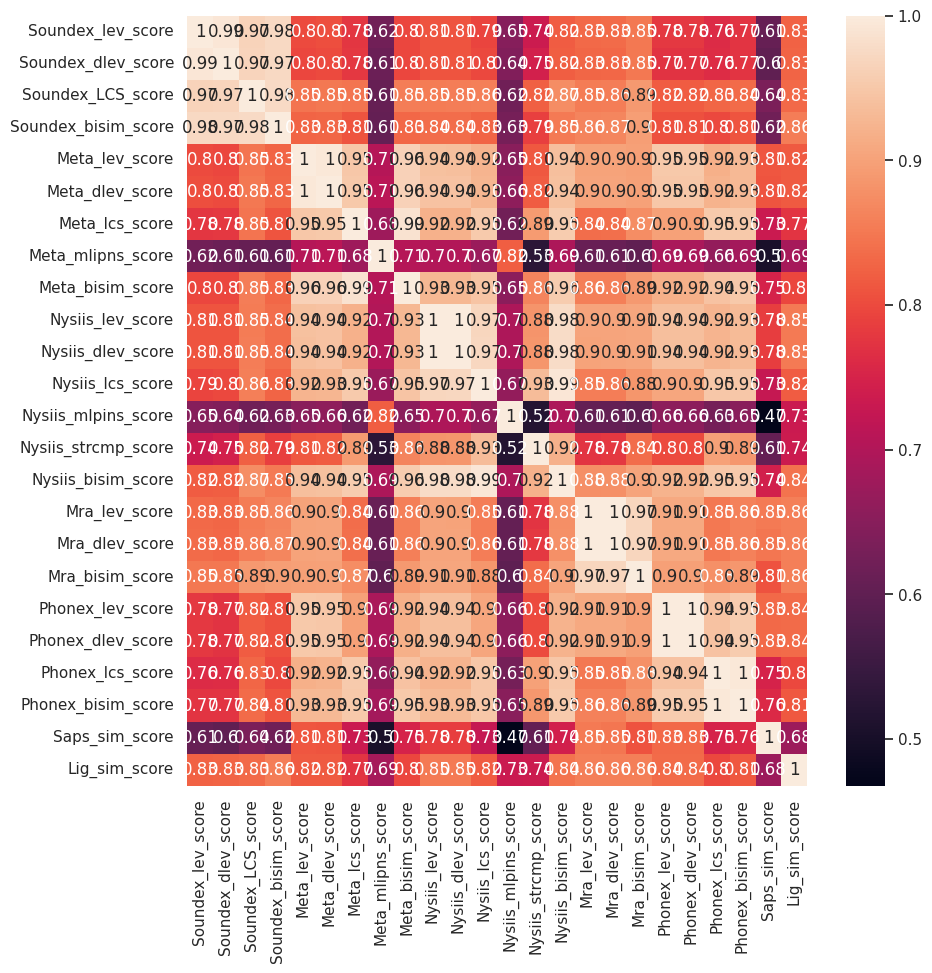

In [125]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(df_to_match[['Soundex_lev_score', 'Soundex_dlev_score', 'Soundex_LCS_score', 'Soundex_bisim_score', 'Meta_lev_score', 'Meta_dlev_score', 'Meta_lcs_score', 'Meta_mlipns_score', 'Meta_bisim_score',  'Nysiis_lev_score', 'Nysiis_dlev_score', 'Nysiis_lcs_score', 'Nysiis_mlipns_score', 'Nysiis_strcmp_score', 'Nysiis_bisim_score', 'Mra_lev_score', 'Mra_dlev_score', 'Mra_bisim_score', 'Phonex_lev_score', 'Phonex_dlev_score', 'Phonex_lcs_score', 'Phonex_bisim_score', 'Saps_sim_score', 'Lig_sim_score']].corr(),annot=True)
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(15,30)})
plt.show()
# soundex lev , dlev , lcs , bisim, -- soundex bisim
# metaphone lev,dlev,lcs, bisim, - -  metaphone bisim
# metaphone lev,dlev,lcs,bisim - nysiis lev , dlev , lcs -- nysiis bisim
# meta mlipins
# nysiis lev, dlev, lcs , bigram  - phonex lev , phonex dlev
# nysiis mlipns
# nysiis strcmp95
# mra lev,dlev,bisim -- mra bisim
# phonex lev, dlev,bisim -- phonex bisim
# saps sim score  
# lig 

In [126]:
# Final selection of fuzzy logics is :'Soundex_bisim_score','Meta_bisim_score','Meta_mlipns_score','Nysiis_bisim_score','Nysiis_mlipns_score', 'Nysiis_strcmp_score','Mra_bisim_score','Phonex_bisim_score','Saps_sim_score', 'Lig_sim_score'
# total 10 fuzzy logics selected

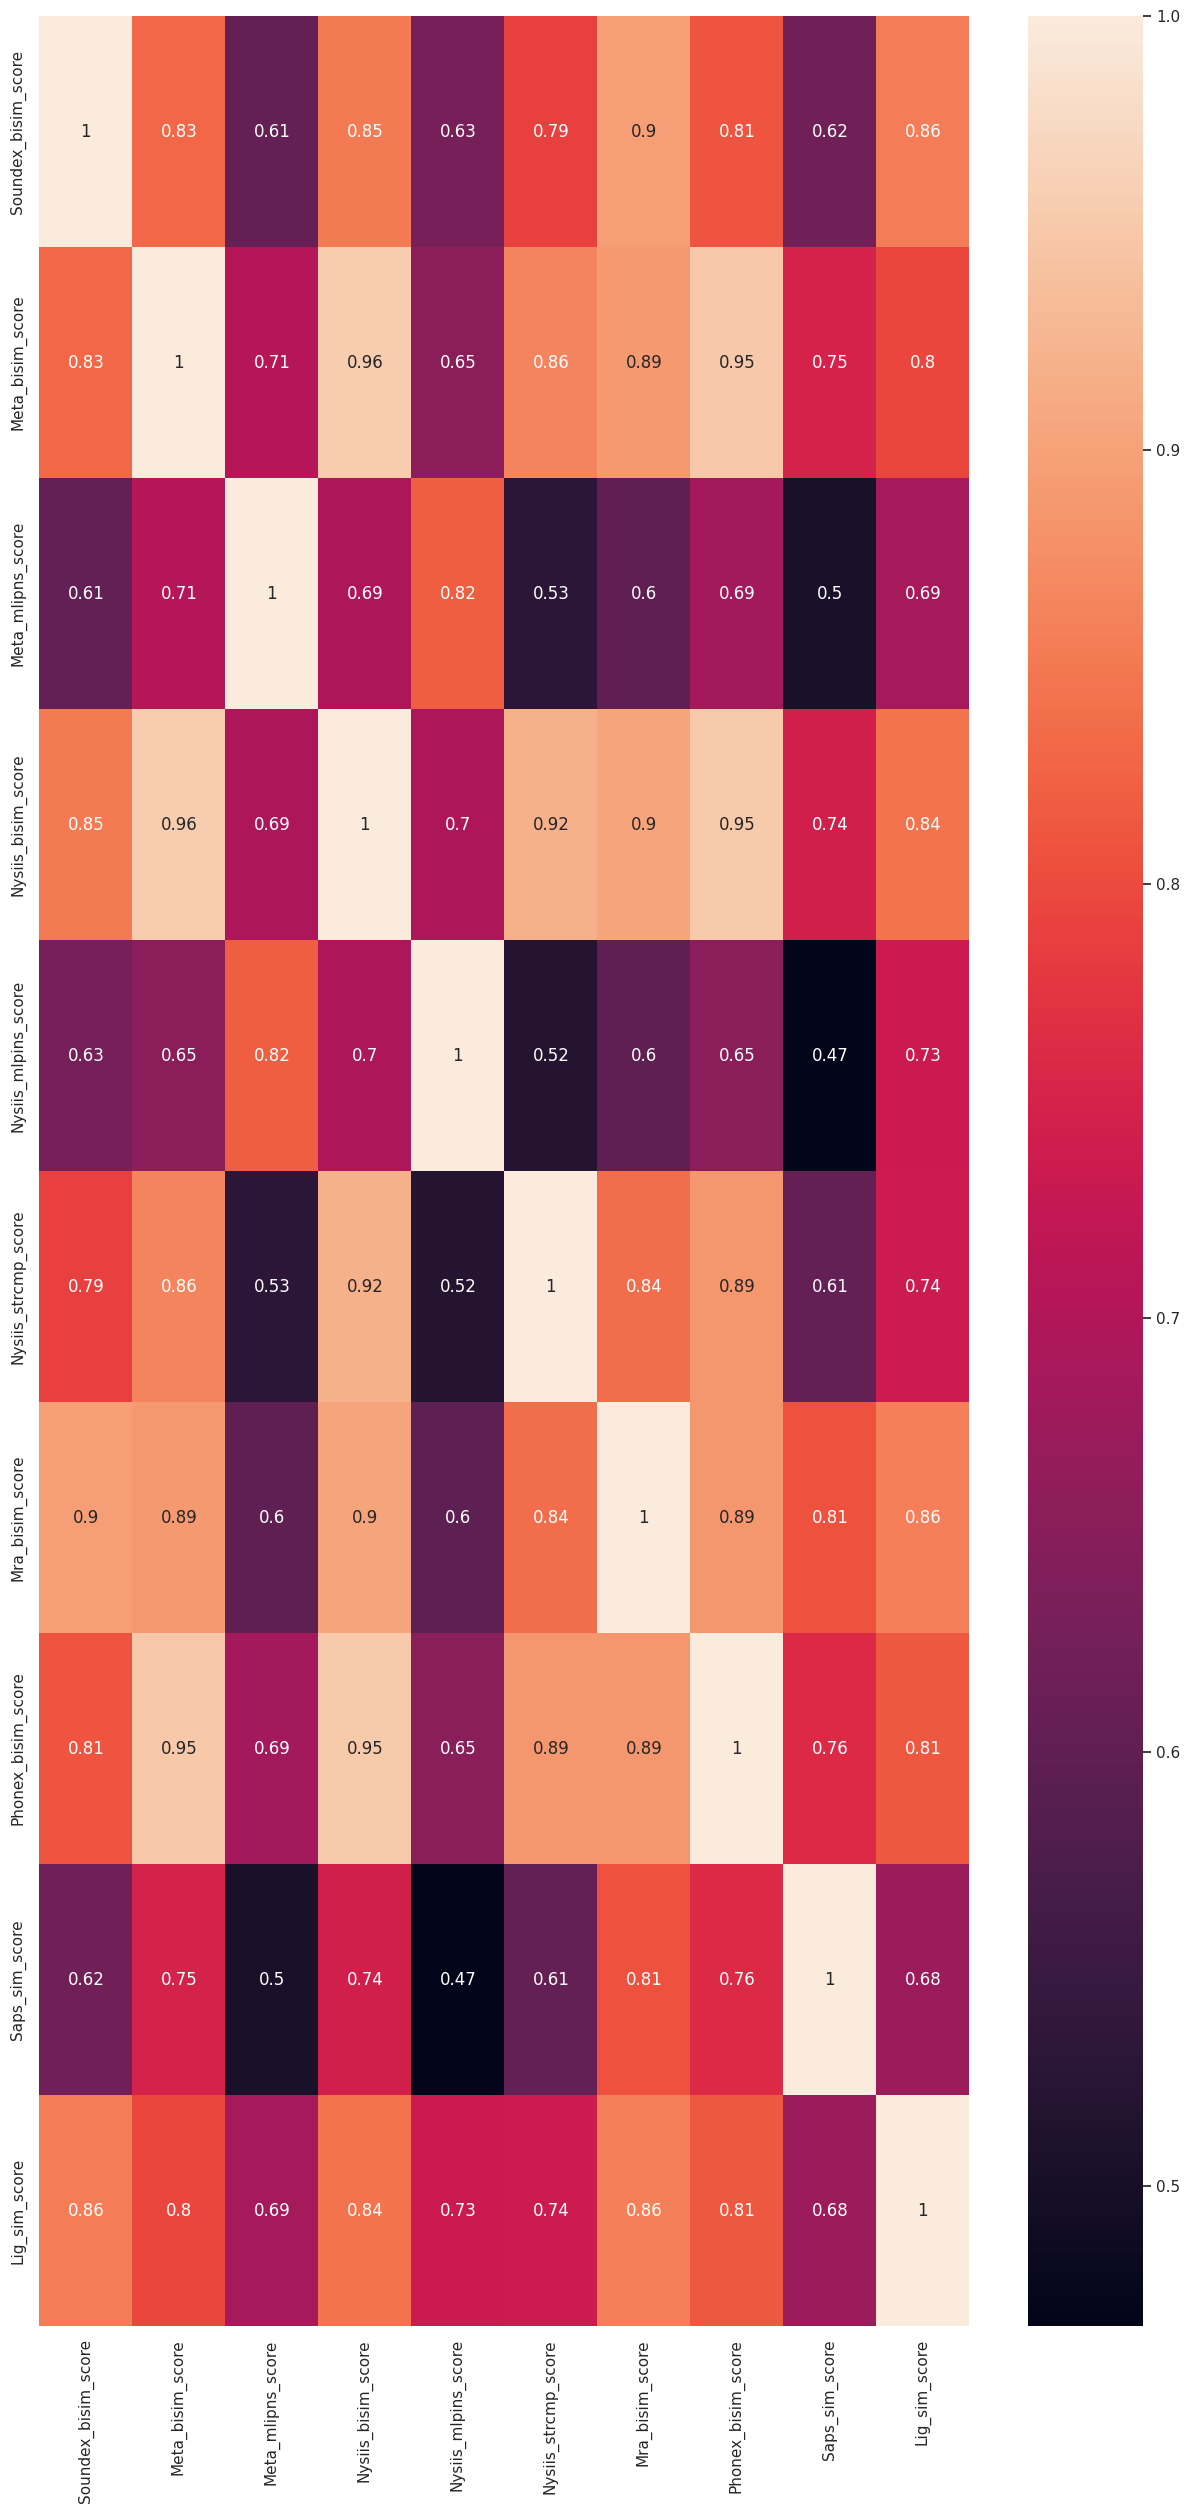

In [127]:
sns.heatmap(df_to_match[['Soundex_bisim_score','Meta_bisim_score','Meta_mlipns_score','Nysiis_bisim_score','Nysiis_mlipns_score', 'Nysiis_strcmp_score','Mra_bisim_score','Phonex_bisim_score','Saps_sim_score', 'Lig_sim_score']].corr(),annot=True)
sns.set(font_scale=0.2)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [133]:
# Final selection of fuzzy logics is :'Soundex_bisim_score','Meta_bisim_score','Meta_mlipns_score','Nysiis_bisim_score','Nysiis_mlipns_score', 'Nysiis_strcmp_score','Mra_bisim_score','Phonex_bisim_score','Saps_sim_score', 'Lig_sim_score'
# total 10 fuzzy logics selected
for i in ['Soundex_bisim_score','Meta_bisim_score','Meta_mlipns_score','Nysiis_bisim_score','Nysiis_mlipns_score', 'Nysiis_strcmp_score','Mra_bisim_score','Phonex_bisim_score','Saps_sim_score', 'Lig_sim_score']:
     df_to_match["Final_"+i]=df_to_match[i].values



In [142]:
df_to_match=df_to_match[['N_PARTY_WATCHLIST_MATCH_ID','ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES',"PARTY_NAMES","WL_NAMES","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score']]
#df_to_match[['Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score']]

## Data Integration - 1

In [143]:
df=pd.merge(df,df_to_match,how='left',on="N_PARTY_WATCHLIST_MATCH_ID")

In [144]:
df["V_RESOLUTION"]=df["V_RESOLUTION"].apply(lambda x: 1 if x in ["TH","THNM"] else 0)
df.shape

(701181, 48)

In [145]:
df.columns

Index(['V_UCIF_ID', 'N_WATCHLIST_PROFILE_ID', 'N_PARTY_WATCHLIST_MATCH_ID', 'D_CREATED_DTM', 'V_CUST_DOB', 'V_DOB', 'V_DOB_2', 'V_WATCHLIST_DOB_2', 'V_IC_DOB', 'V_COMMENTS', 'V_RESOLUTION', 'FINAL_DOB_MATCH', 'DOB_MATCH_1', 'DOB_MATCH_2', 'DOB_MATCH_3', 'DOB_MATCH_4', 'V_GENDER', 'V_WL_GENDER', 'Gender_Match_Score', 'V_CITIZENSHIP', 'V_DUAL_CITIZENSHIP', 'V_NATIONALITY', 'nat_iso_0', 'nat_iso_1', 'nat_iso_2', 'Nationality_Score', 'ID_score', 'al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1', 'ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'PARTY_NAMES', 'WL_NAMES', 'NAME_MATCH_SCORE', 'N_MATCH_SCORE', 'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score'], dtype='object')

## Data Visualization -1

In [146]:
df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701181 entries, 0 to 701180
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FINAL_DOB_MATCH            701181 non-null  float64
 1   Gender_Match_Score         701181 non-null  int64  
 2   Nationality_Score          701181 non-null  int64  
 3   ID_score                   701181 non-null  float64
 4   NAME_MATCH_SCORE           701181 non-null  float64
 5   N_MATCH_SCORE              701181 non-null  float64
 6   Final_Soundex_bisim_score  701181 non-null  float64
 7   Final_Meta_mlipns_score    701181 non-null  float64
 8   Final_Meta_bisim_score     701181 non-null  float64
 9   Final_Nysiis_mlipns_score  701181 non-null  float64
 10  Final_Nysiis_strcmp_score  701181 non-null  float64
 11  Final_Nysiis_bisim_score   701181 non-null  float64
 12  Final_Phonex_bisim_score   701181 non-null  float64
 13  Final_Saps_sim_score       70

In [147]:
df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]].describe()
# mean values for FINAL_DOB_MATCH, ID_score is negative which means that count of -1 values is higher than all non-negative values.Further since -1 data points are high std deviations for them is also high.


FINAL_DOB_MATCH  Gender_Match_Score  Nationality_Score       ID_score  NAME_MATCH_SCORE  N_MATCH_SCORE  Final_Soundex_bisim_score  Final_Meta_mlipns_score  Final_Meta_bisim_score  Final_Nysiis_mlipns_score  Final_Nysiis_strcmp_score  Final_Nysiis_bisim_score  Final_Phonex_bisim_score  Final_Saps_sim_score  Final_Lig_sim_score  Final_Mra_bisim_score   V_RESOLUTION
count    701181.000000       701181.000000      701181.000000  701181.000000      7.011810e+05  701181.000000              701181.000000            701181.000000           701181.000000              701181.000000              701181.000000             701181.000000             701181.000000         701181.000000        701181.000000          701181.000000  701181.000000
mean         -0.038038            0.899595           0.936824      -0.303257      2.791814e-01      95.471430                   0.760267                 0.589060                0.776555                   0.537526                   0.880495                  0.802795                  0.783540              0.699638             0.713855               0.783186       0.156186
std           0.715968            0.432746           0.349802       0.695746      4.800526e-01       4.015393                   0.313086                 0.492005                0.259166                   0.498590                   0.210841                  0.246587                  0.246714              0.426352             0.357762               0.284643       0.363032
min          -1.000000           -1.000000          -1.000000      -1.000000     -1.000000e+00      90.000000                   0.000000                 0.000000                0.000000                   0.000000                   0.000000                  0.000000                  0.000000              0.000000             0.000000               0.000000       0.000000
25%          -1.000000            1.000000           1.000000      -1.000000      1.243681e-10      92.000000                   0.625000                 0.000000                0.650000                   0.000000                   0.847811                  0.690476                  0.660000              0.214286             0.454545               0.666667       0.000000
50%           0.000000            1.000000           1.000000       0.000000      7.229390e-04      94.000000                   1.000000                 1.000000                0.833333                   1.000000                   0.955556                  0.888889                  0.863636              1.000000             0.937500               1.000000       0.000000
75%           0.600000            1.000000           1.000000       0.000000      8.797652e-01     100.000000                   1.000000                 1.000000                1.000000                   1.000000                   1.000000                  1.000000                  1.000000              1.000000             1.000000               1.000000       0.000000
max           1.000000            1.000000           1.000000       1.000000      8.855559e-01     100.000000                   1.000000                 1.000000                1.000000                   1.000000                   1.000000                  1.000000                  1.000000              1.000000             1.000000               1.000000       1.000000

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
sns.__version__

'0.13.0'

<Axes: >

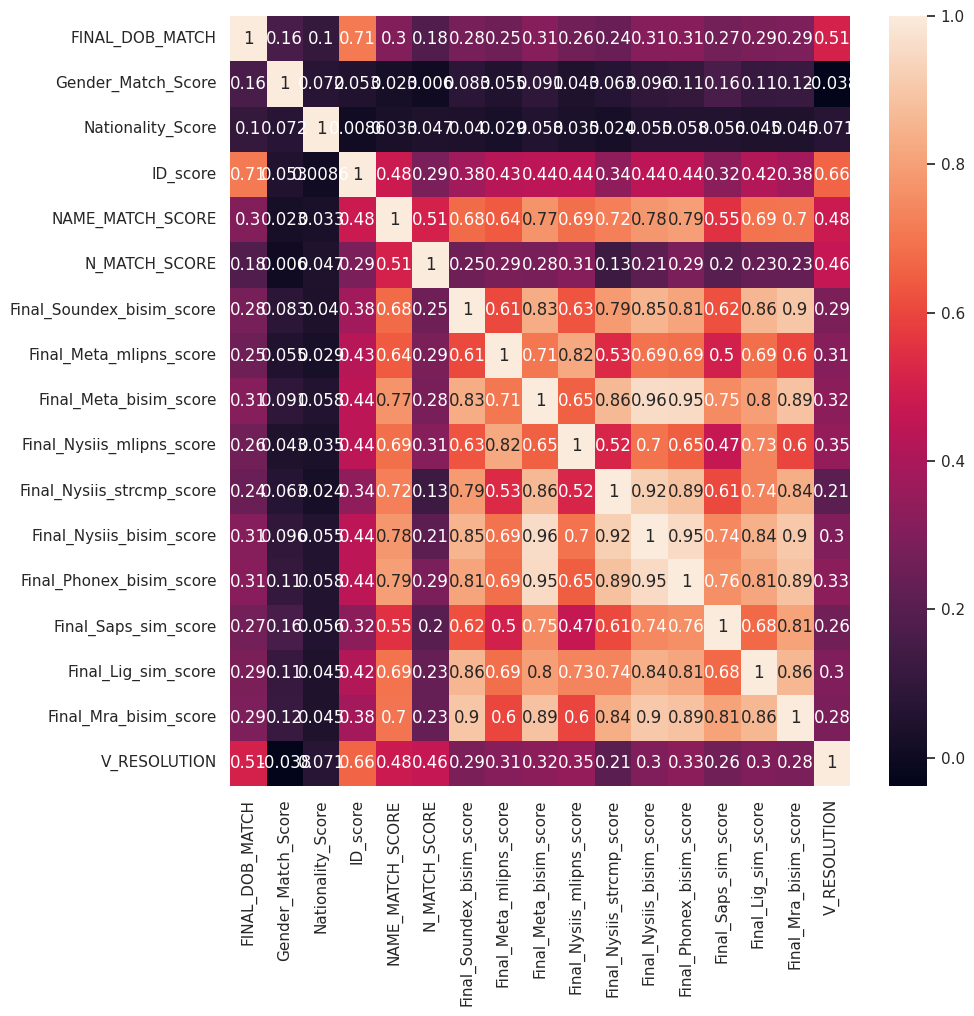

In [150]:
sns.heatmap(df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]].corr(),annot=True)

In [151]:
df["V_RESOLUTION"]

0         0
1         1
2         1
3         0
4         0
         ..
701176    0
701177    0
701178    0
701179    0
701180    0
Name: V_RESOLUTION, Length: 701181, dtype: int64

In [152]:
df.columns

Index(['V_UCIF_ID', 'N_WATCHLIST_PROFILE_ID', 'N_PARTY_WATCHLIST_MATCH_ID', 'D_CREATED_DTM', 'V_CUST_DOB', 'V_DOB', 'V_DOB_2', 'V_WATCHLIST_DOB_2', 'V_IC_DOB', 'V_COMMENTS', 'V_RESOLUTION', 'FINAL_DOB_MATCH', 'DOB_MATCH_1', 'DOB_MATCH_2', 'DOB_MATCH_3', 'DOB_MATCH_4', 'V_GENDER', 'V_WL_GENDER', 'Gender_Match_Score', 'V_CITIZENSHIP', 'V_DUAL_CITIZENSHIP', 'V_NATIONALITY', 'nat_iso_0', 'nat_iso_1', 'nat_iso_2', 'Nationality_Score', 'ID_score', 'al_wl_ids', 'cust_id_all_sp_accom', 'trans_agg_v_id_type', 'score1', 'ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'PARTY_NAMES', 'WL_NAMES', 'NAME_MATCH_SCORE', 'N_MATCH_SCORE', 'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score'], dtype='object')

Pairplot

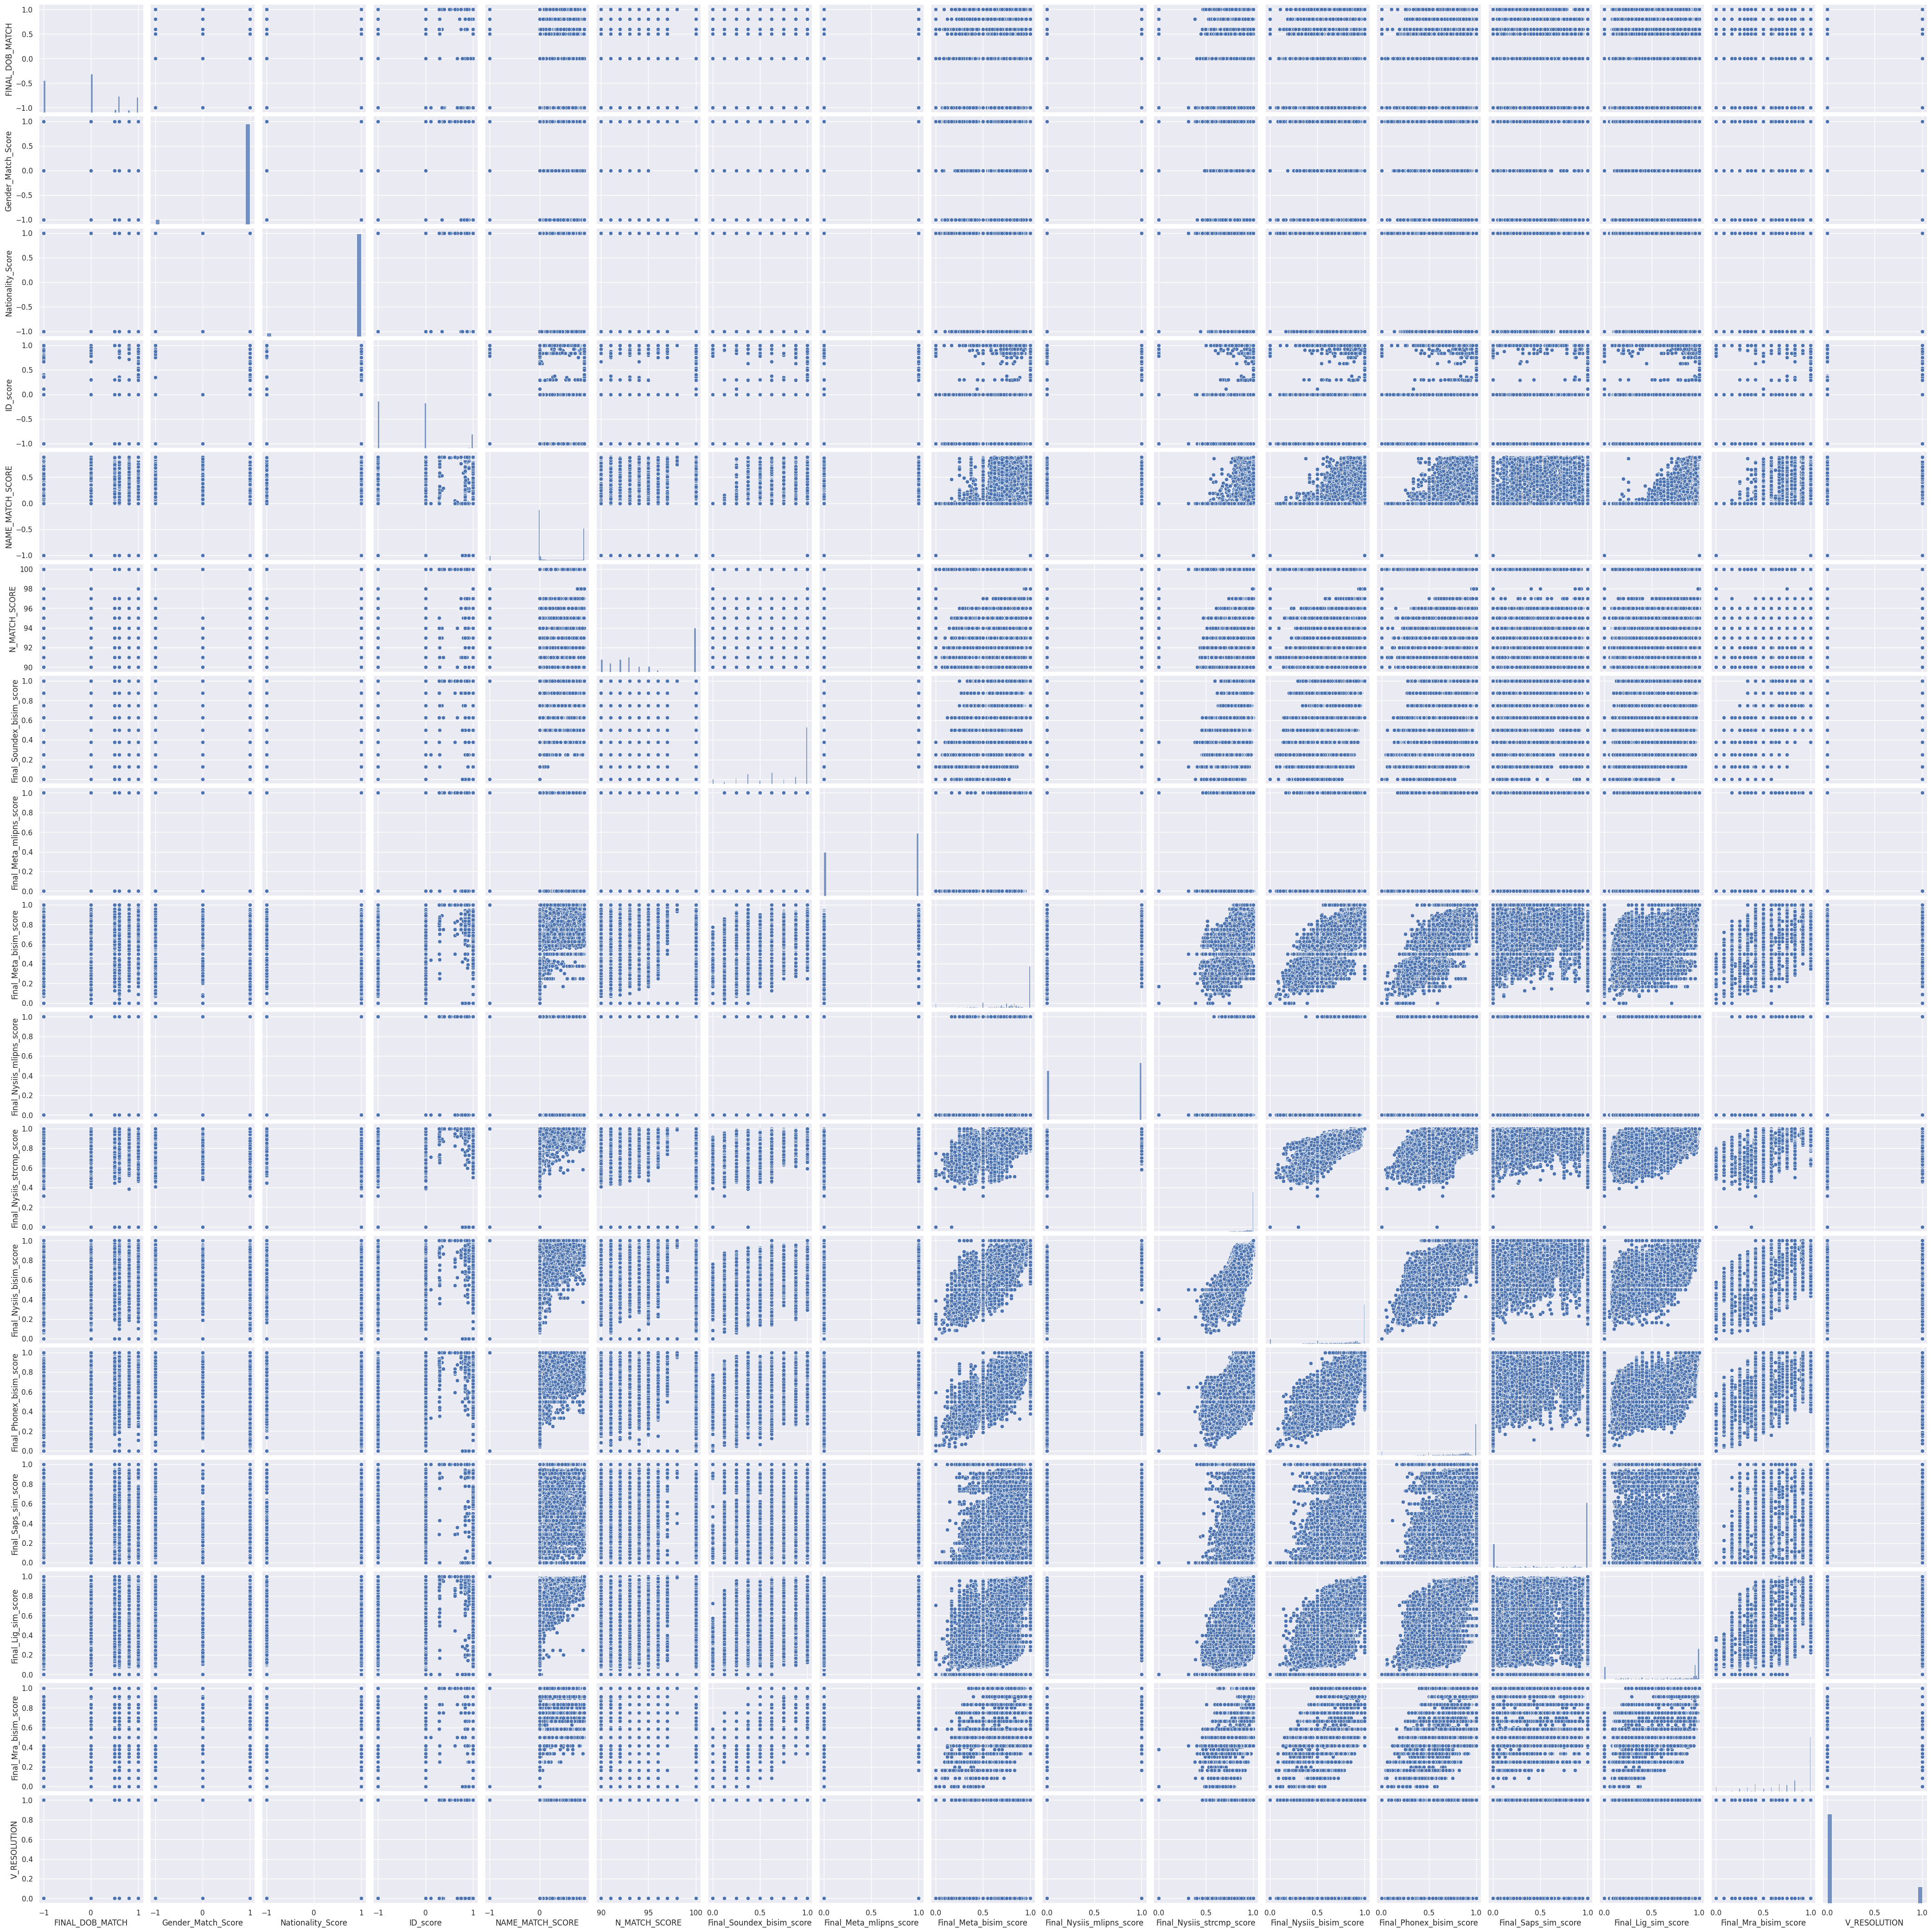

In [153]:
sns.pairplot(df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]],kind="scatter")
# the plots are all linear in nature 

In [154]:
# histograpm for each similarity scores
# box plot for each histogram
# bar plot
# regplot
# pairplot
# 

### Fuzzy logics for ALL_PARTY_NAMES,ALL_WL_NAMES,ALL_ALIAS_NAMES

In [155]:
df["ALL_PARTY_NAMES"]=df["ALL_PARTY_NAMES"].apply (lambda x : list(set(x)))
df["ALL_WL_NAMES"]=df["ALL_PARTY_NAMES"].apply (lambda x : list(set(x)))
df["ALL_ALIAS_NAMES"]=df["ALL_ALIAS_NAMES"].apply (lambda x : list(set(x)))


df["ALL_PARTY_NAMES"]=df["ALL_PARTY_NAMES"].apply(lambda x:list(filter(lambda item: item!='',x)) if "" in x else x)
df["ALL_WL_NAMES"]=df["ALL_WL_NAMES"].apply(lambda x:list(filter(lambda item: item!='',x)) if "" in x else x)
df["ALL_ALIAS_NAMES"]=df["ALL_ALIAS_NAMES"].apply(lambda x:list(filter(lambda item: item!='',x)) if "" in x else x)

In [156]:
df["ALL_PARTY_NAMES_soundex_encode"]=df["ALL_PARTY_NAMES"].apply(lambda x: [ jellyfish.soundex(i) for i in x])
df["ALL_PARTY_NAMES_meta_encode"]=df["ALL_PARTY_NAMES"].apply(lambda x: [ meta.encode(i) for i in x])
df["ALL_PARTY_NAMES_nysiis_encode"]=df["ALL_PARTY_NAMES"].apply(lambda x: [ jellyfish.nysiis(i) for i in x])
df["ALL_PARTY_NAMES_mra_encode"]=df["ALL_PARTY_NAMES"].apply(lambda x: [ jellyfish.match_rating_codex(i) for i in x])
df["ALL_PARTY_NAMES_pe_encode"]=df["ALL_PARTY_NAMES"].apply(lambda x: [ pe.encode(i)  for i in x])


df["ALL_WL_NAMES_soundex_encode"]=df["ALL_WL_NAMES"].apply(lambda x: [ jellyfish.soundex(i) for i in x])
df["ALL_WL_NAMES_meta_encode"]=df["ALL_WL_NAMES"].apply(lambda x: [ meta.encode(i) for i in x])
df["ALL_WL_NAMES_nysiis_encode"]=df["ALL_WL_NAMES"].apply(lambda x: [ jellyfish.nysiis(i) for i in x])
df["ALL_WL_NAMES_mra_encode"]=df["ALL_WL_NAMES"].apply(lambda x: [ jellyfish.match_rating_codex(i) for i in x])
df["ALL_WL_NAMES_pe_encode"]=df["ALL_WL_NAMES"].apply(lambda x: [ pe.encode(i)  for i in x])


In [157]:
df["ALL_ALIAS_NAMES_soundex_encode"]=df["ALL_ALIAS_NAMES"].apply(lambda x: [ jellyfish.soundex(i) for i in x])
df["ALL_ALIAS_NAMES_meta_encode"]=df["ALL_ALIAS_NAMES"].apply(lambda x: [ meta.encode(i) for i in x])
df["ALL_ALIAS_NAMES_nysiis_encode"]=df["ALL_ALIAS_NAMES"].apply(lambda x: [ jellyfish.nysiis(i) for i in x])
df["ALL_ALIAS_NAMES_mra_encode"]=df["ALL_ALIAS_NAMES"].apply(lambda x: [ jellyfish.match_rating_codex(i) for i in x])
df["ALL_ALIAS_NAMES_pe_encode"]=df["ALL_ALIAS_NAMES"].apply(lambda x: [ pe.encode(i)  for i in x])



In [158]:
df[df["ALL_PARTY_NAMES"].apply(lambda x: len(x)==0)]["ALL_PARTY_NAMES"].apply(lambda x: max)

138169    <built-in function max>
150405    <built-in function max>
179935    <built-in function max>
261529    <built-in function max>
328225    <built-in function max>
348852    <built-in function max>
373007    <built-in function max>
397610    <built-in function max>
431172    <built-in function max>
471673    <built-in function max>
504422    <built-in function max>
504440    <built-in function max>
555832    <built-in function max>
582859    <built-in function max>
656851    <built-in function max>
661739    <built-in function max>
670170    <built-in function max>
684190    <built-in function max>
Name: ALL_PARTY_NAMES, dtype: object

In [177]:
df["Soundex_bisim_score"]=df[["ALL_PARTY_NAMES_soundex_encode","ALL_WL_NAMES_soundex_encode"]].apply(lambda x: [bisim.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0 for j in x[1] for i in x[0]],axis=1)
df["Meta_mlipns_score"]=df[["ALL_PARTY_NAMES_meta_encode","ALL_WL_NAMES_meta_encode"]].apply(lambda x: [ mlipns.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0 for j in x[1] for i in x[0]],axis=1)
df["Meta_bisim_score"]=df[["ALL_PARTY_NAMES_meta_encode","ALL_WL_NAMES_meta_encode"]].apply(lambda x: [ bisim.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Nysiis_mlipns_score"]=df[["ALL_PARTY_NAMES_nysiis_encode","ALL_WL_NAMES_nysiis_encode"]].apply(lambda x: [mlipns.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Nysiis_strcmp_score"]=df[["ALL_PARTY_NAMES_nysiis_encode","ALL_WL_NAMES_nysiis_encode"]].apply(lambda x: [strcmp95.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0   for j in x[1] for i in x[0]],axis=1)
df["Nysiis_bisim_score"]=df[["ALL_PARTY_NAMES_nysiis_encode","ALL_WL_NAMES_nysiis_encode"]].apply(lambda x: [bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0 for j in x[1] for i in x[0]],axis=1)
df["Mra_bisim_score"]=df[["ALL_PARTY_NAMES_mra_encode","ALL_WL_NAMES_mra_encode"]].apply(lambda x: [ bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Phonex_bisim_score"]=df[["ALL_PARTY_NAMES_pe_encode","ALL_WL_NAMES_pe_encode"]].apply(lambda x: [ bisim.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Saps_sim_score"]=df[["ALL_PARTY_NAMES_pe_encode","ALL_WL_NAMES_pe_encode"]].apply(lambda x: [ bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0   for j in x[1] for i in x[0]],axis=1)
df["Lig_sim_score"]=df[["ALL_PARTY_NAMES_pe_encode","ALL_WL_NAMES_pe_encode"]].apply(lambda x: [ bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
                                                                                                                                                                                        

In [178]:
df["Al_Soundex_bisim_score"]=df[["ALL_ALIAS_NAMES_soundex_encode","ALL_WL_NAMES_soundex_encode"]].apply(lambda x: [bisim.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0 for j in x[1] for i in x[0]],axis=1)
df["Al_Meta_mlipns_score"]=df[["ALL_ALIAS_NAMES_meta_encode","ALL_WL_NAMES_meta_encode"]].apply(lambda x: [ mlipns.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0 for j in x[1] for i in x[0]],axis=1)
df["Al_Meta_bisim_score"]=df[["ALL_ALIAS_NAMES_meta_encode","ALL_WL_NAMES_meta_encode"]].apply(lambda x: [ bisim.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Al_Nysiis_mlipns_score"]=df[["ALL_ALIAS_NAMES_nysiis_encode","ALL_WL_NAMES_nysiis_encode"]].apply(lambda x: [mlipns.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Al_Nysiis_strcmp_score"]=df[["ALL_ALIAS_NAMES_nysiis_encode","ALL_WL_NAMES_nysiis_encode"]].apply(lambda x: [strcmp95.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0   for j in x[1] for i in x[0]],axis=1)
df["Al_Nysiis_bisim_score"]=df[["ALL_ALIAS_NAMES_nysiis_encode","ALL_WL_NAMES_nysiis_encode"]].apply(lambda x: [bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0 for j in x[1] for i in x[0]],axis=1)
df["Al_Mra_bisim_score"]=df[["ALL_ALIAS_NAMES_mra_encode","ALL_WL_NAMES_mra_encode"]].apply(lambda x: [ bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Al_Phonex_bisim_score"]=df[["ALL_ALIAS_NAMES_pe_encode","ALL_WL_NAMES_pe_encode"]].apply(lambda x: [ bisim.sim(i,j) if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
df["Al_Saps_sim_score"]=df[["ALL_ALIAS_NAMES_pe_encode","ALL_WL_NAMES_pe_encode"]].apply(lambda x: [ bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0   for j in x[1] for i in x[0]],axis=1)
df["Al_Lig_sim_score"]=df[["ALL_ALIAS_NAMES_pe_encode","ALL_WL_NAMES_pe_encode"]].apply(lambda x: [ bisim.sim(i,j)  if (len(i) !=0 and len(j) !=0 ) else 0  for j in x[1] for i in x[0]],axis=1)
                                                                                                                                                                                        

In [179]:
def func(df,col1,col2):
    df[col1]=df[col1].apply(lambda x:  0 if len(x)==0 else max(x))
    df[col2]=df[col2].apply(lambda x:  0 if len(x)==0 else max(x))
    df["Final_"+col1]=df[[col1,col2]].apply(lambda x: max(x[0],x[1]) , axis=1)
    return df
func(df,"Soundex_bisim_score","Al_Soundex_bisim_score")
func(df,"Meta_bisim_score","Al_Meta_bisim_score")
func(df,"Meta_mlipns_score","Al_Meta_mlipns_score")
func(df,"Nysiis_mlipns_score","Al_Nysiis_mlipns_score")
func(df,"Nysiis_strcmp_score","Al_Nysiis_strcmp_score")
func(df,"Nysiis_bisim_score","Al_Nysiis_bisim_score")
func(df,"Mra_bisim_score","Al_Mra_bisim_score")
func(df,"Phonex_bisim_score","Al_Phonex_bisim_score")
func(df,"Saps_sim_score","Al_Saps_sim_score")
func(df,"Lig_sim_score","Al_Lig_sim_score")

V_UCIF_ID  N_WATCHLIST_PROFILE_ID  N_PARTY_WATCHLIST_MATCH_ID        D_CREATED_DTM                                    V_CUST_DOB                   V_DOB V_DOB_2 V_WATCHLIST_DOB_2                V_IC_DOB                                         V_COMMENTS  V_RESOLUTION  FINAL_DOB_MATCH  DOB_MATCH_1  DOB_MATCH_2  DOB_MATCH_3  DOB_MATCH_4 V_GENDER V_WL_GENDER  Gender_Match_Score V_CITIZENSHIP V_DUAL_CITIZENSHIP V_NATIONALITY nat_iso_0 nat_iso_1 nat_iso_2  Nationality_Score  ID_score                     al_wl_ids                     cust_id_all_sp_accom       trans_agg_v_id_type                                             score1 ALL_ALIAS_NAMES             ALL_PARTY_NAMES                ALL_WL_NAMES               PARTY_NAMES                 WL_NAMES  NAME_MATCH_SCORE  N_MATCH_SCORE  Final_Soundex_bisim_score  Final_Meta_mlipns_score  Final_Meta_bisim_score  Final_Nysiis_mlipns_score  Final_Nysiis_strcmp_score  Final_Nysiis_bisim_score  Final_Phonex_bisim_score  Final_Saps_sim_score  Final_Lig_sim_score  Final_Mra_bisim_score ALL_PARTY_NAMES_soundex_encode ALL_PARTY_NAMES_meta_encode ALL_PARTY_NAMES_nysiis_encode ALL_PARTY_NAMES_mra_encode ALL_PARTY_NAMES_pe_encode ALL_WL_NAMES_soundex_encode ALL_WL_NAMES_meta_encode ALL_WL_NAMES_nysiis_encode ALL_WL_NAMES_mra_encode  ALL_WL_NAMES_pe_encode ALL_ALIAS_NAMES_soundex_encode ALL_ALIAS_NAMES_meta_encode ALL_ALIAS_NAMES_nysiis_encode ALL_ALIAS_NAMES_mra_encode ALL_ALIAS_NAMES_pe_encode  Al_Soundex_bisim_score  Al_Meta_mlipns_score  Al_Meta_bisim_score  Al_Nysiis_mlipns_score  Al_Nysiis_strcmp_score  Al_Nysiis_bisim_score  Al_Mra_bisim_score  Al_Phonex_bisim_score  Al_Saps_sim_score  Al_Lig_sim_score  Soundex_bisim_score Meta_mlipins_score  Meta_bisim_score  Nysiis_mlipns_score  Nysiis_strcmp_score  Nysiis_bisim_score  Mra_bisim_score  Phonex_bisim_score  Saps_sim_score  Lig_sim_score  Meta_mlipns_score
0       144414189                 4744018                     1087675  2020-09-07 23:51:55  [['1956', '10', '09'], ['1956', '10', '09']]  [['1956', '05', '15']]    [[]]              [[]]  [['1956', '05', '15']]                          Mismatch ID number_NRIC\n             0              0.6         -1.0          0.6          0.6         -1.0        M           M                   1           MYS                NaN      MALAYSIA       MYS       NaN       NaN                  1     0.000   ['4975714', '560515016155']              ['5069449', '561009106435']            ['DD', 'NWIC']  {'exact_m': [], 'substring_m': [], 'leven_m': ...              []  [SAHARUDDIN BIN MD SALLEH]  [SAHARUDDIN BIN MD SALLEH]  SAHARUDDIN BIN MD SALLEH  SHARUDDIN BIN MD SALLEH      4.186295e-15           95.0                        1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0                         [S635]               [SHRTNBNMTSL]        [SAHARADAN BAN ND SAL]                   [SHRSLH]     [sæhɑuddɪnbɪnmdsɔlɛh]                      [S635]            [SHRTNBNMTSL]     [SAHARADAN BAN ND SAL]                [SHRSLH]   [sæhɑuddɪnbɪnmdsɔlɛh]                             []                          []                            []                         []                        []                     0.0                   0.0                  0.0                     0.0                     0.0                    0.0                 0.0                    0.0                0.0               0.0                  1.0              [1.0]               1.0                  1.0                  1.0                 1.0              1.0                 1.0             1.0            1.0                1.0
1        55620697                 4744620                      613373  2020-09-07 12:55:53                                          [[]]  [['1958', '10', '22']]    [[]]              [[]]  [['1958', '10', '22']]                                    

In [180]:
df[['Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score']]

Final_Soundex_bisim_score  Final_Meta_mlipns_score  Final_Meta_bisim_score  Final_Nysiis_mlipns_score  Final_Nysiis_strcmp_score  Final_Nysiis_bisim_score  Final_Phonex_bisim_score  Final_Saps_sim_score  Final_Lig_sim_score  Final_Mra_bisim_score
0                             1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
1                             1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
2                             1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
3                             1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
4                             1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
...                           ...                      ...                     ...                        ...                        ...                       ...                       ...                   ...                  ...                    ...
701176                        1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
701177                        1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
701178                        1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
701179                        1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0
701180                        1.0                      1.0                     1.0                        1.0                        1.0                       1.0                       1.0                   1.0                  1.0                    1.0

[701181 rows x 10 columns]

In [181]:
#sns.pairplot(df[['Soundex_lev_score', 'Soundex_dlev_score', 'Soundex_LCS_score', 'Soundex_bisim_score']], hue="V_RESOLUTION",kind="scatter")

In [0]:
df.columns

## Data Visualization -2

In [208]:
df["FINAL_DOB_MATCH"]=df_dob["FINAL_DOB_MATCH"].values
df["V_RESOLUTION"]=df_dob["V_RESOLUTION"].values
df["Gender_Match_Score"]=df_gender["Gender_Match_Score"]
df["Nationality_Score"]=df_nationality["Nationality_Score"]
df["ID_score"]=df_id["ID_score"]

In [209]:
df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701181 entries, 0 to 701180
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FINAL_DOB_MATCH            701181 non-null  float64
 1   Gender_Match_Score         701181 non-null  int64  
 2   Nationality_Score          701181 non-null  int64  
 3   ID_score                   701181 non-null  float64
 4   NAME_MATCH_SCORE           701181 non-null  float64
 5   N_MATCH_SCORE              701181 non-null  float64
 6   Final_Soundex_bisim_score  701181 non-null  float64
 7   Final_Meta_mlipns_score    701181 non-null  float64
 8   Final_Meta_bisim_score     701181 non-null  float64
 9   Final_Nysiis_mlipns_score  701181 non-null  float64
 10  Final_Nysiis_strcmp_score  701181 non-null  float64
 11  Final_Nysiis_bisim_score   701181 non-null  float64
 12  Final_Phonex_bisim_score   701181 non-null  float64
 13  Final_Saps_sim_score       70

In [210]:
df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]].describe()
# mean values for FINAL_DOB_MATCH, ID_score is negative which means that count of -1 values is higher than all non-negative values.Further since -1 data points are high std deviations for them is also high.


FINAL_DOB_MATCH  Gender_Match_Score  Nationality_Score       ID_score  NAME_MATCH_SCORE  N_MATCH_SCORE  Final_Soundex_bisim_score  Final_Meta_mlipns_score  Final_Meta_bisim_score  Final_Nysiis_mlipns_score  Final_Nysiis_strcmp_score  Final_Nysiis_bisim_score  Final_Phonex_bisim_score  Final_Saps_sim_score  Final_Lig_sim_score  Final_Mra_bisim_score
count    701181.000000       701181.000000      701181.000000  701181.000000      7.011810e+05  701181.000000              701181.000000            701181.000000           701181.000000              701181.000000              701181.000000             701181.000000             701181.000000         701181.000000        701181.000000          701181.000000
mean         -0.038038            0.899595           0.936824      -0.303257      2.791814e-01      95.471430                   0.999974                 0.999974                0.999974                   0.999974                   0.999974                  0.999974                  0.999974              0.999974             0.999974               0.999974
std           0.715968            0.432746           0.349802       0.695746      4.800526e-01       4.015393                   0.005067                 0.005067                0.005067                   0.005067                   0.005067                  0.005067                  0.005067              0.005067             0.005067               0.005067
min          -1.000000           -1.000000          -1.000000      -1.000000     -1.000000e+00      90.000000                   0.000000                 0.000000                0.000000                   0.000000                   0.000000                  0.000000                  0.000000              0.000000             0.000000               0.000000
25%          -1.000000            1.000000           1.000000      -1.000000      1.243681e-10      92.000000                   1.000000                 1.000000                1.000000                   1.000000                   1.000000                  1.000000                  1.000000              1.000000             1.000000               1.000000
50%           0.000000            1.000000           1.000000       0.000000      7.229390e-04      94.000000                   1.000000                 1.000000                1.000000                   1.000000                   1.000000                  1.000000                  1.000000              1.000000             1.000000               1.000000
75%           0.600000            1.000000           1.000000       0.000000      8.797652e-01     100.000000                   1.000000                 1.000000                1.000000                   1.000000                   1.000000                  1.000000                  1.000000              1.000000             1.000000               1.000000
max           1.000000            1.000000           1.000000       1.000000      8.855559e-01     100.000000                   1.000000                 1.000000                1.000000                   1.000000                   1.000000                  1.000000                  1.000000              1.000000             1.000000               1.000000

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

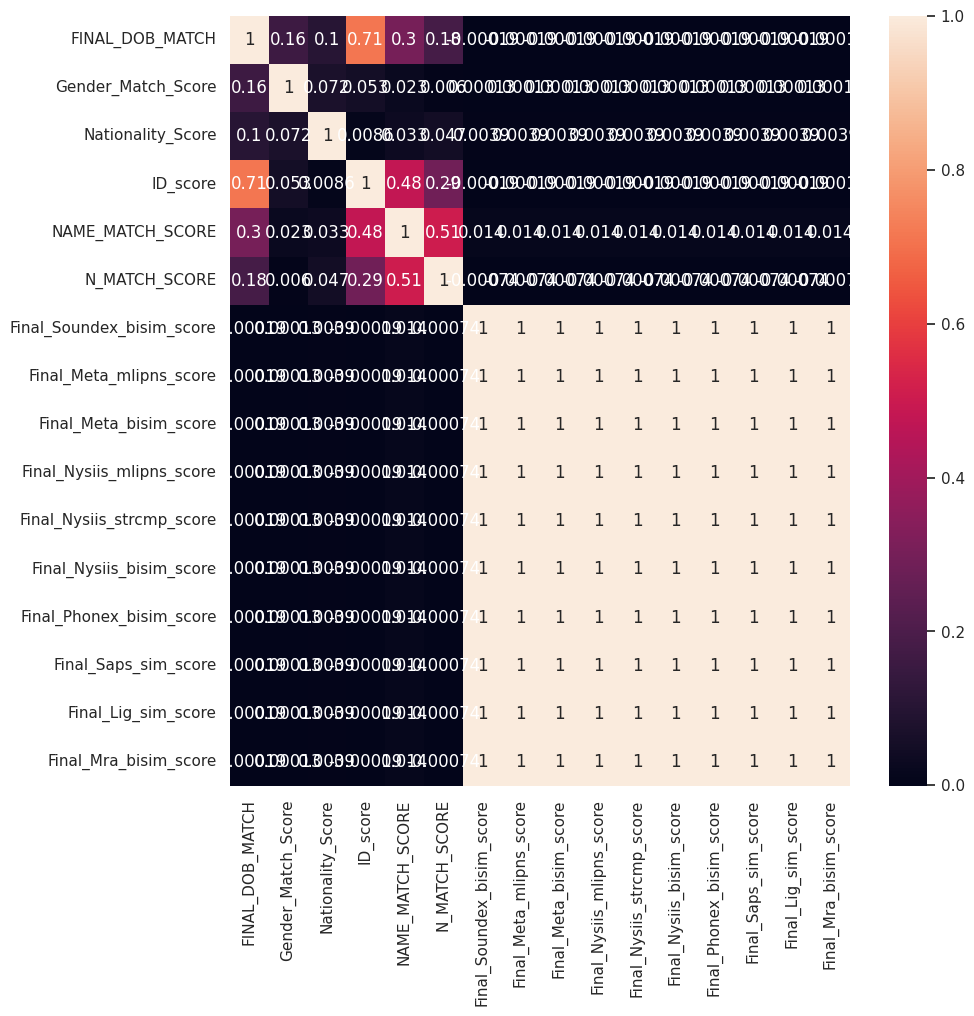

In [212]:
sns.heatmap(df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]].corr(),annot=True)

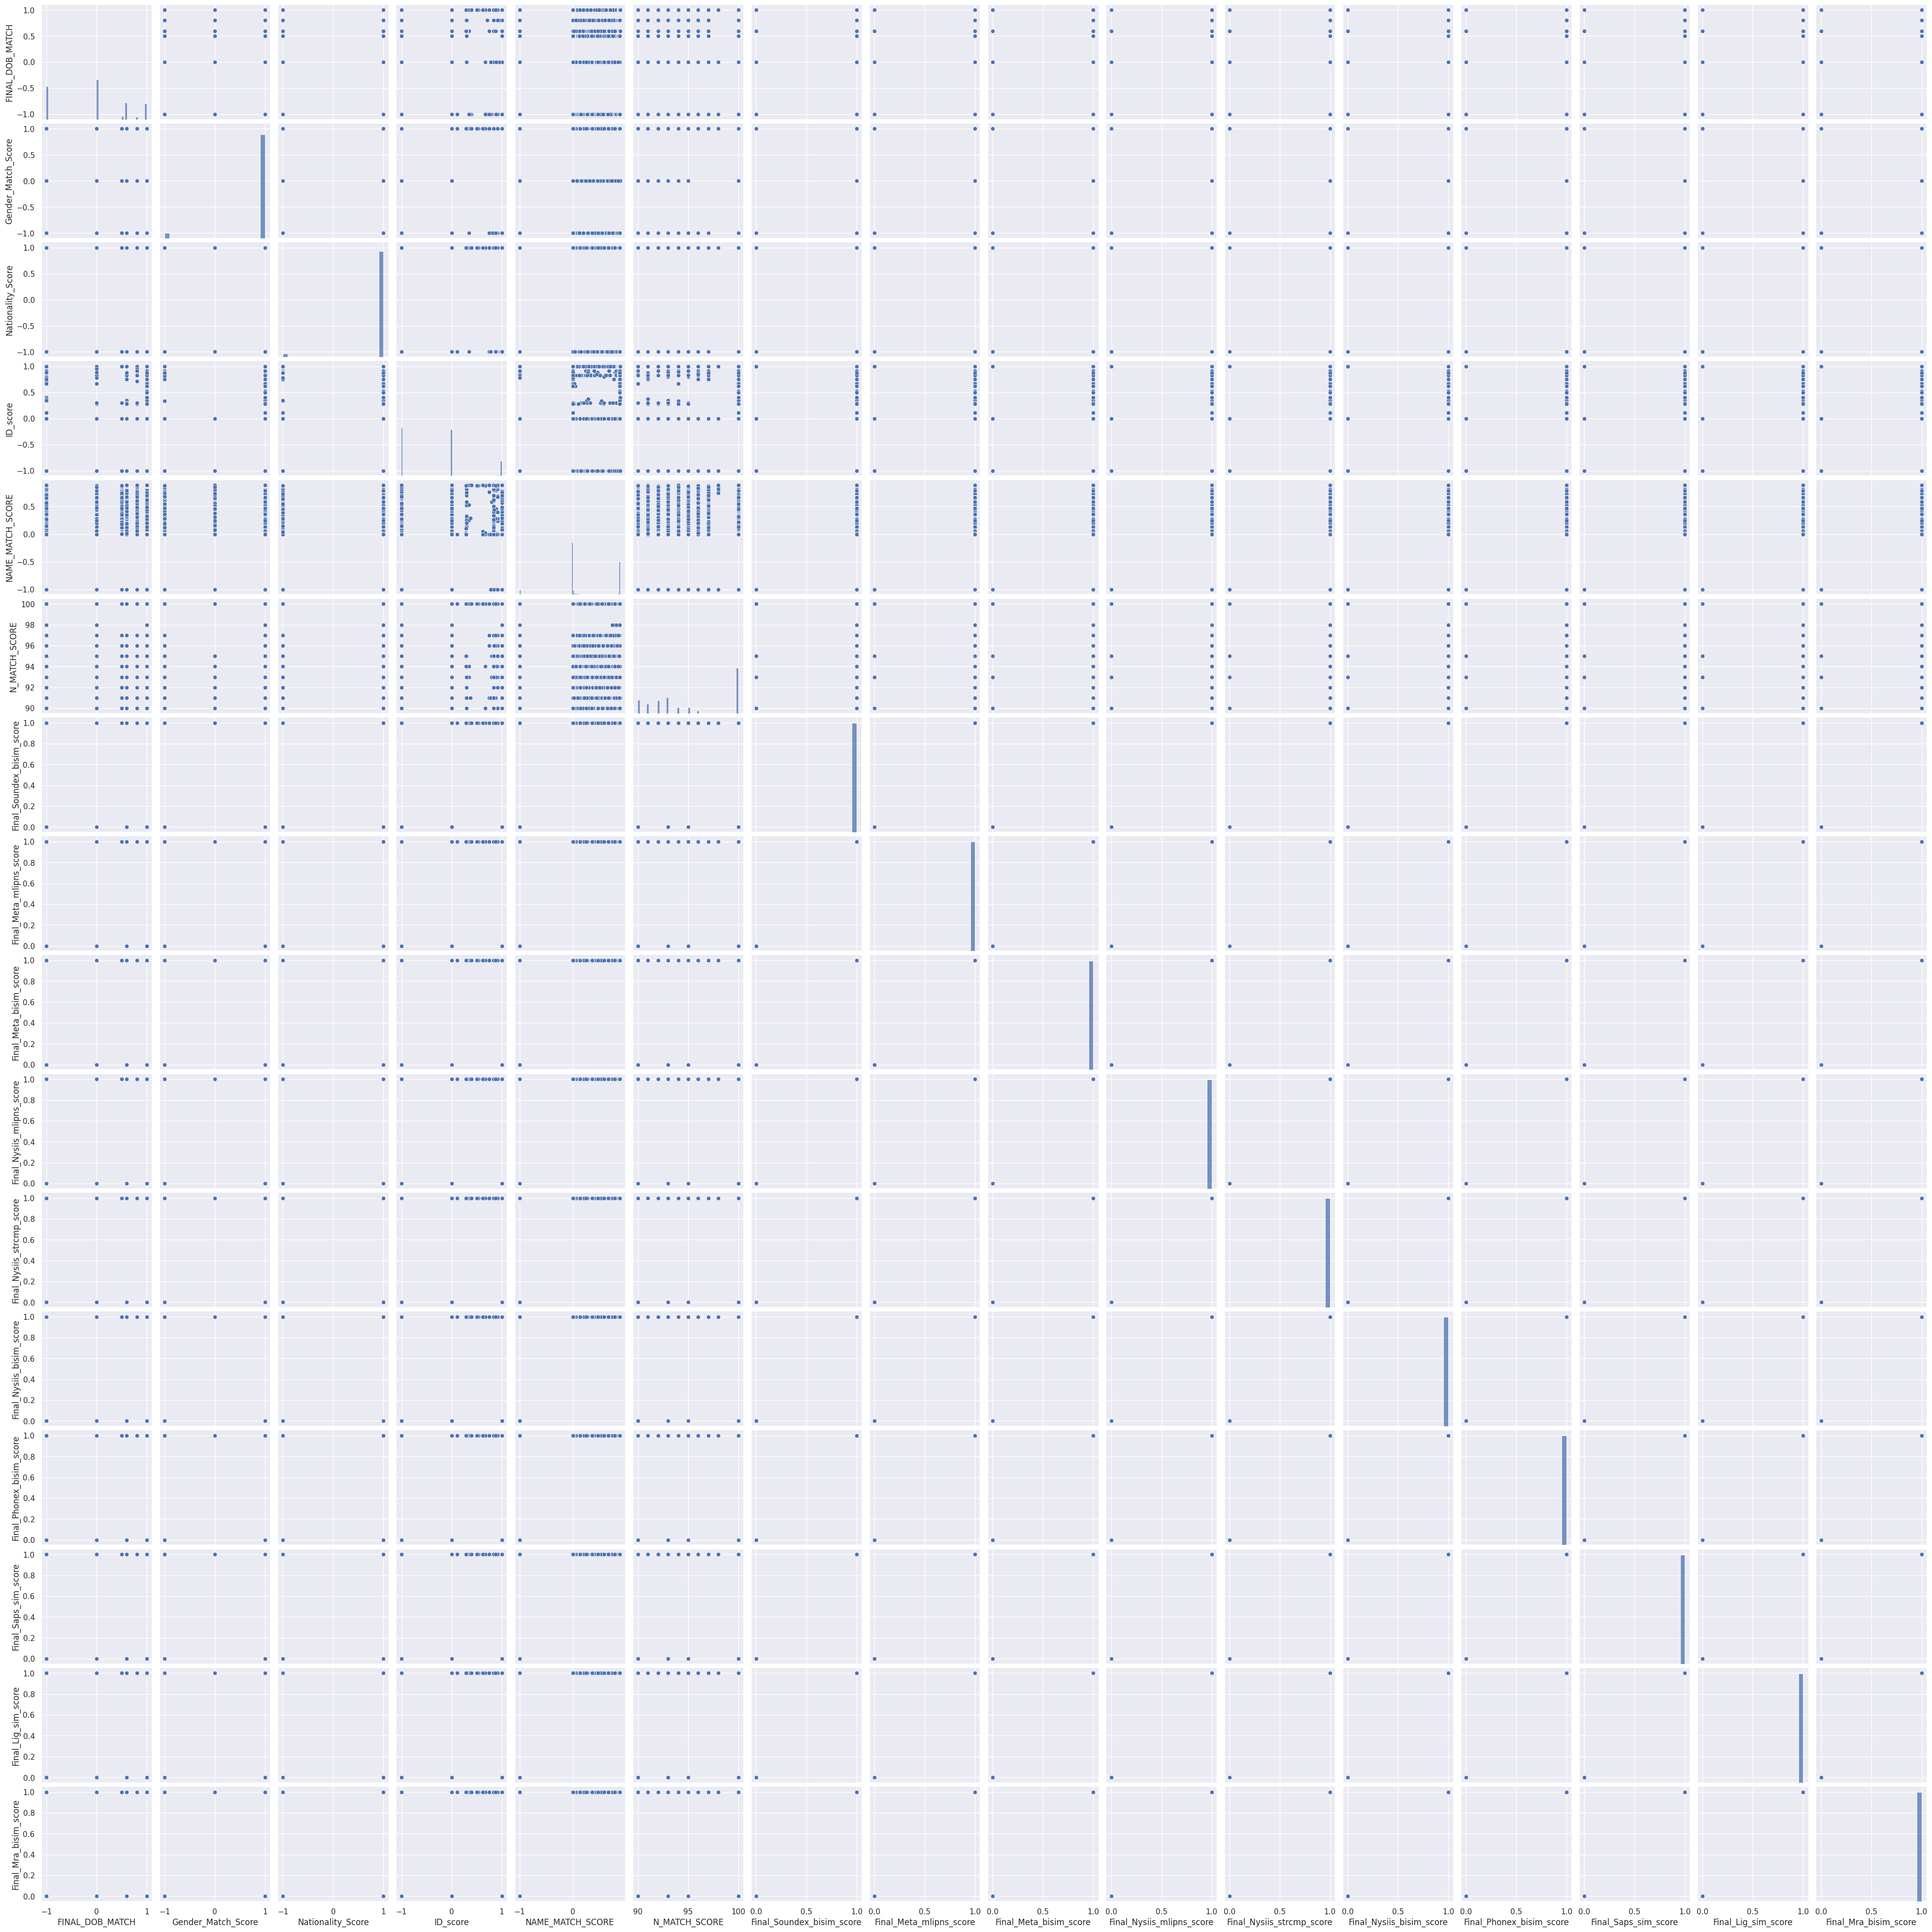

In [213]:
sns.pairplot(df[["FINAL_DOB_MATCH","Gender_Match_Score","Nationality_Score","ID_score","NAME_MATCH_SCORE","N_MATCH_SCORE",'Final_Soundex_bisim_score', 'Final_Meta_mlipns_score', 'Final_Meta_bisim_score', 'Final_Nysiis_mlipns_score', 'Final_Nysiis_strcmp_score', 'Final_Nysiis_bisim_score', 'Final_Phonex_bisim_score', 'Final_Saps_sim_score', 'Final_Lig_sim_score', 'Final_Mra_bisim_score',"V_RESOLUTION"]],kind="scatter")
# the plots are all linear in nature 

In [214]:
# histograpm for each similarity scores
# box plot for each histogram
# bar plot
# regplot
# pairplot
# 

Displot

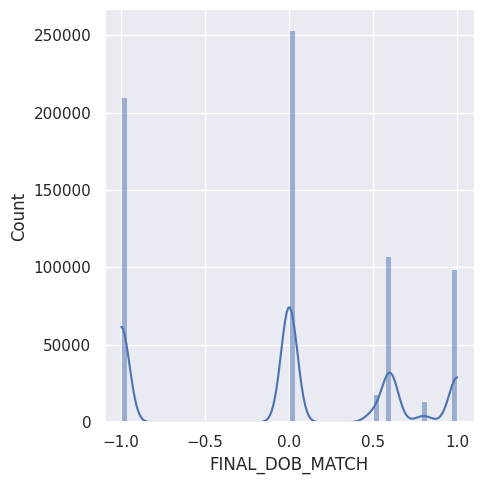

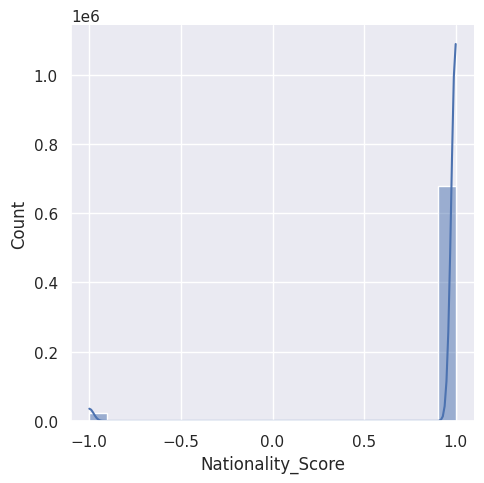

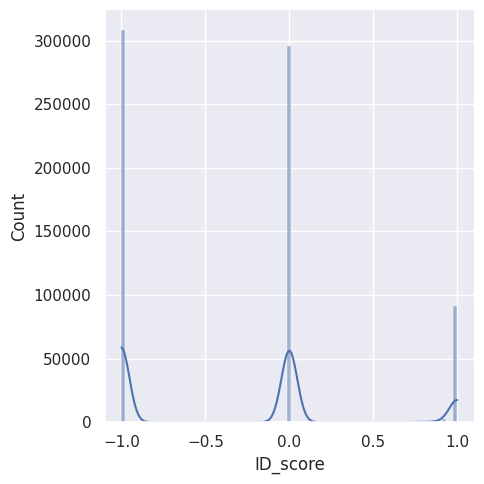

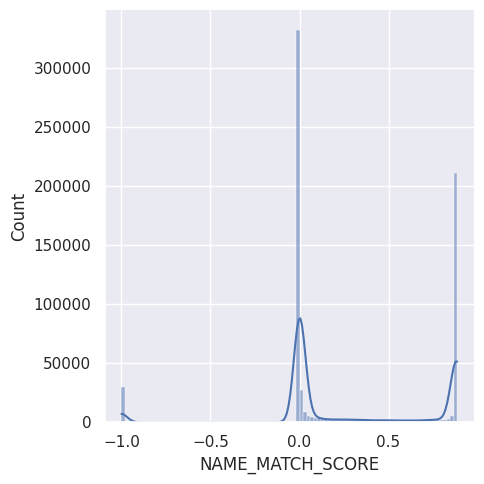

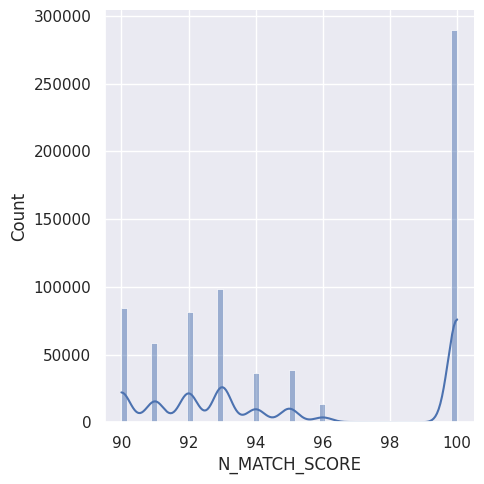

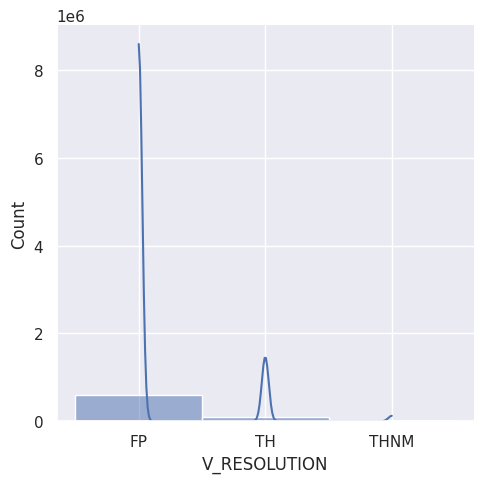

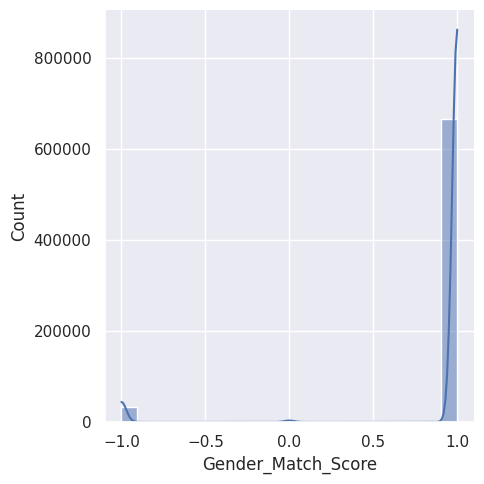

In [215]:
sns.displot(df["FINAL_DOB_MATCH"],kde=True) # most values taken are 0 (approx 2.5lac) followed by -1(2lac) and then  0.6,1 (1lac each) and 0.5 & 0.75 
sns.displot(df["Nationality_Score"],kde=True) #  already nationality is used by MDM therefore score is -1 /1 but count of 1 is very high
sns.displot(df["ID_score"],kde=True)          #  almost -1 & 0 have  are from 3 lac alerts each and 1 lac alerts with 1 value.
sns.displot(df["NAME_MATCH_SCORE"],kde=True)  #  name score has varying value b/w 0 to 1 with peak coming at at values close to 0 and fall at 0.5. 
sns.displot(df["N_MATCH_SCORE"],kde=True)     #  takes highest value at score 100.
sns.displot(df["V_RESOLUTION"],kde=True)      
sns.displot(df["Gender_Match_Score"],kde=True)#  0 values are there indicating that data does not match eventhough it is present It should not the case.  
                                
# the range of values 

Joinplot for every variable because - all variables are numerical

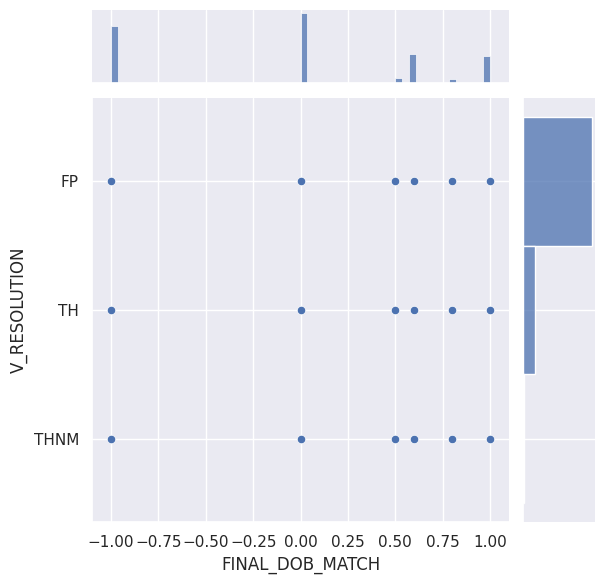

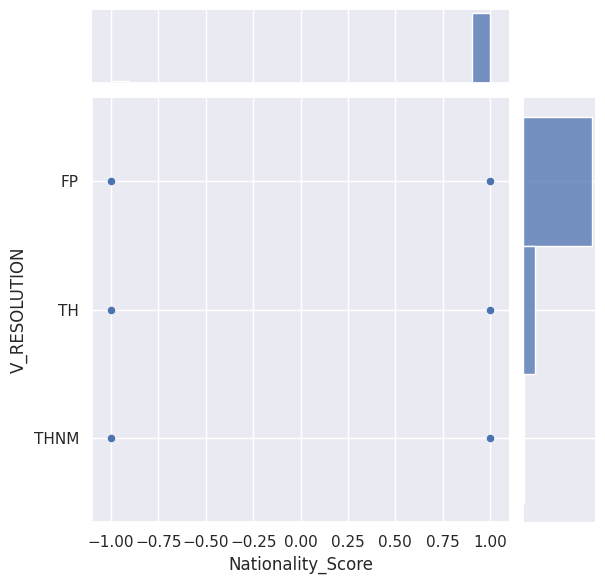

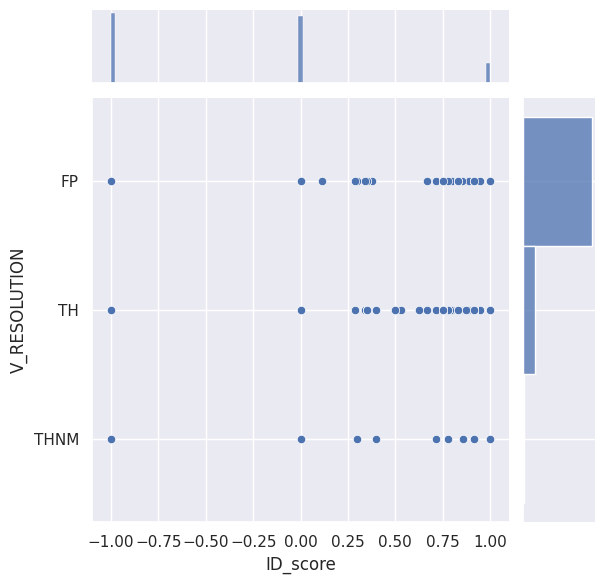

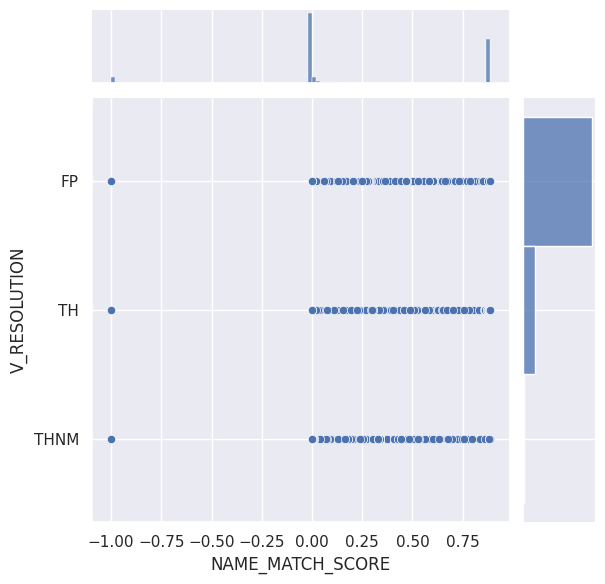

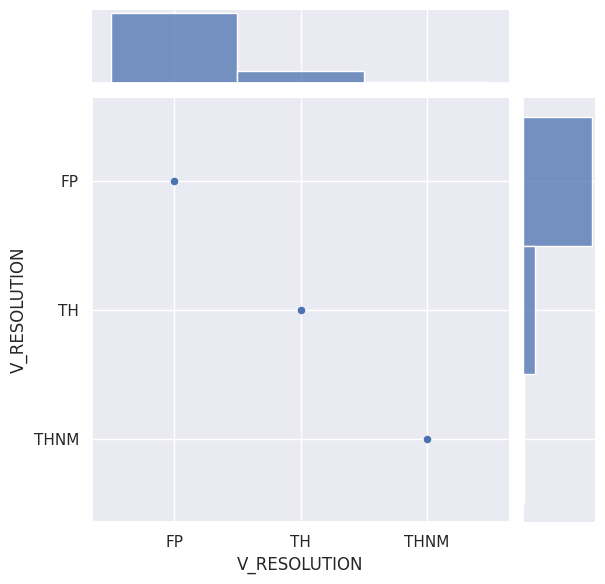

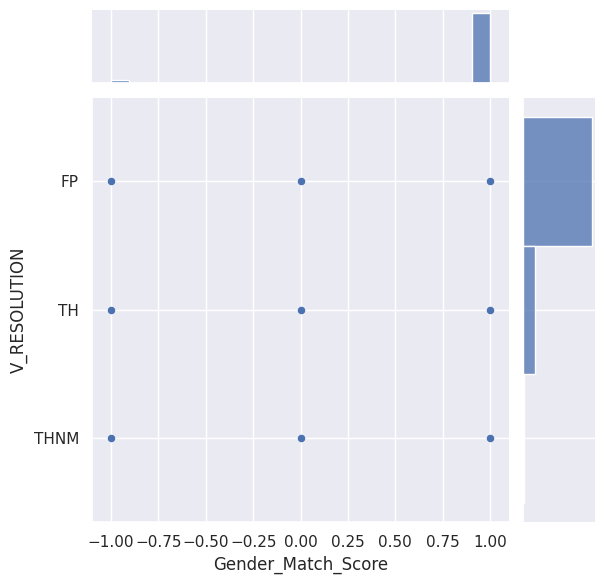

In [216]:
sns.jointplot(x="FINAL_DOB_MATCH",y="V_RESOLUTION",data=df)
sns.jointplot(x="Nationality_Score",y="V_RESOLUTION",data=df)
sns.jointplot(x="ID_score",y="V_RESOLUTION",data=df)
sns.jointplot(x="NAME_MATCH_SCORE",y="V_RESOLUTION",data=df)
sns.jointplot(x="V_RESOLUTION",y="V_RESOLUTION",data=df)
sns.jointplot(x="Gender_Match_Score",y="V_RESOLUTION",data=df)

Boxplot -only for continuous variables not for discrete variables- NAME_MATCH_SCORE,ID_score and gives whether info on median, 1st & 3rd quartile and variation of values

<Axes: ylabel='ID_score'>

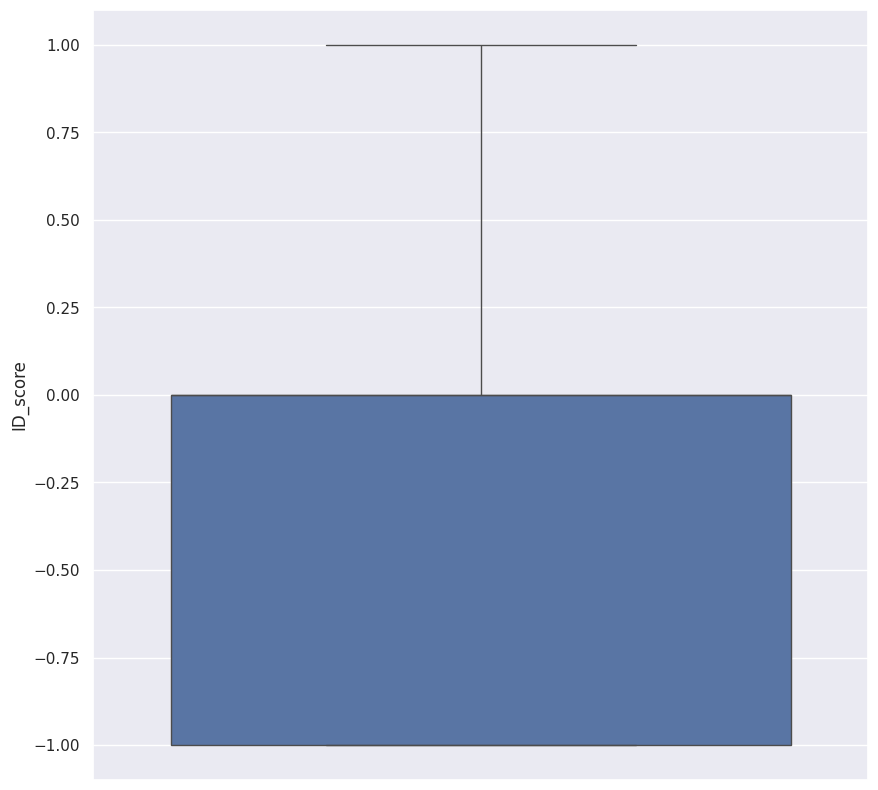

In [217]:
sns.boxplot(df["ID_score"])
# ID has median and 3rd quartile overlapping at 0.So 50% of values are <=0. No outliers

<Axes: ylabel='NAME_MATCH_SCORE'>

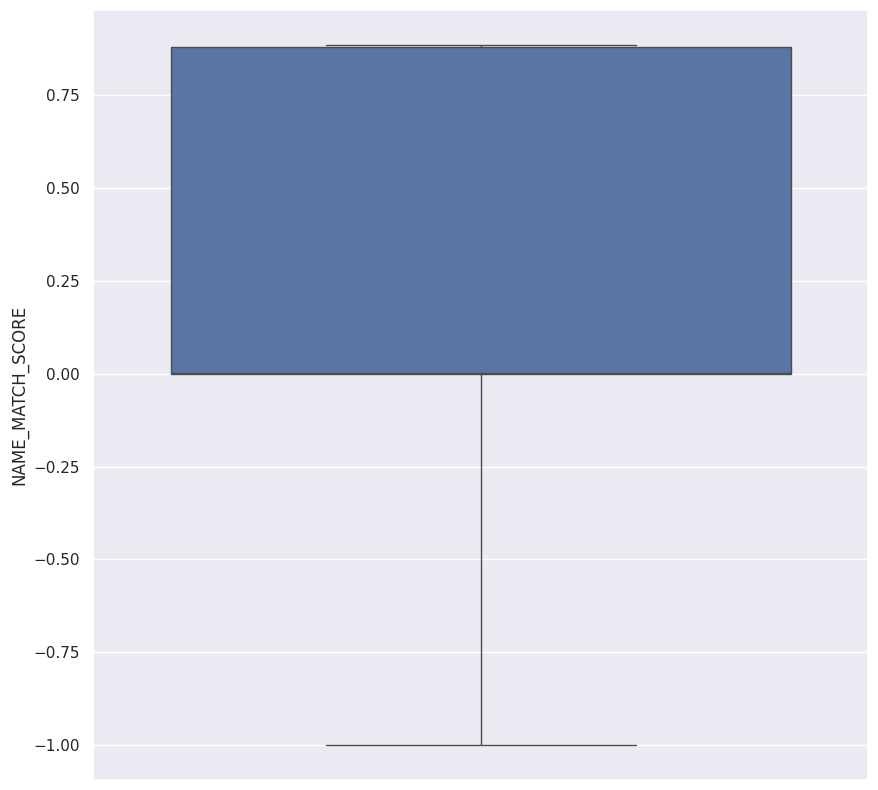

In [218]:
sns.boxplot(df["NAME_MATCH_SCORE"]) # median lies close to 1st quartile that means that majority of values have lower values i.e 0.1.

Barplot -gives an estimation of central tendency of each feature against match & miss-match

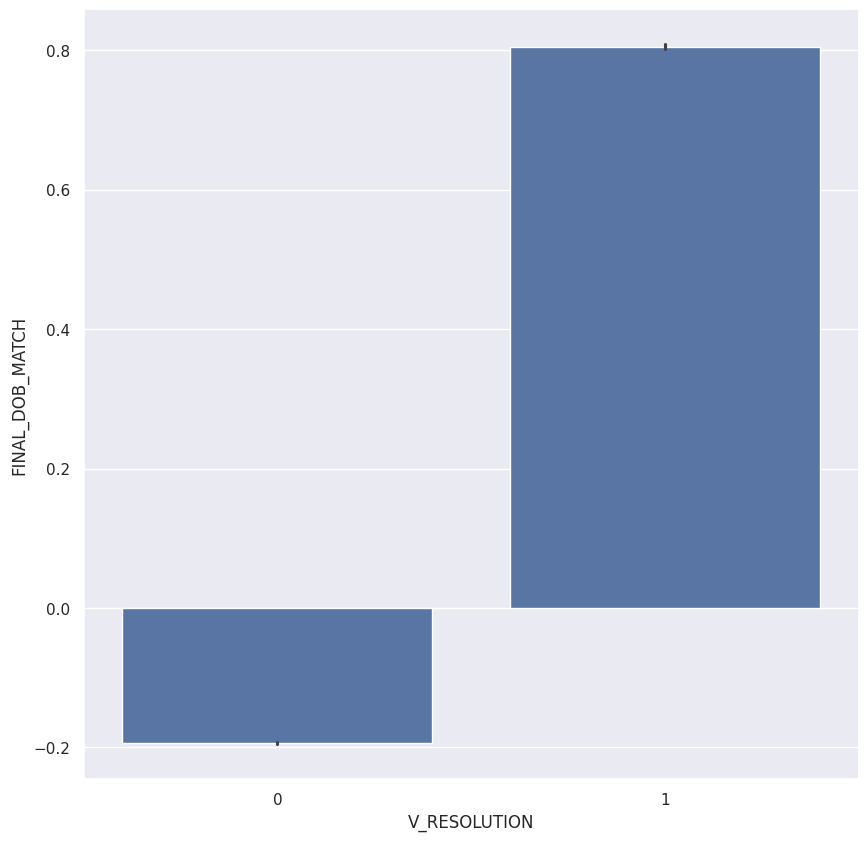

In [223]:
sns.barplot(x="V_RESOLUTION",y="FINAL_DOB_MATCH",data=df,errorbar=('ci',95 ))
plt.show()

<Axes: xlabel='V_RESOLUTION', ylabel='Nationality_Score'>

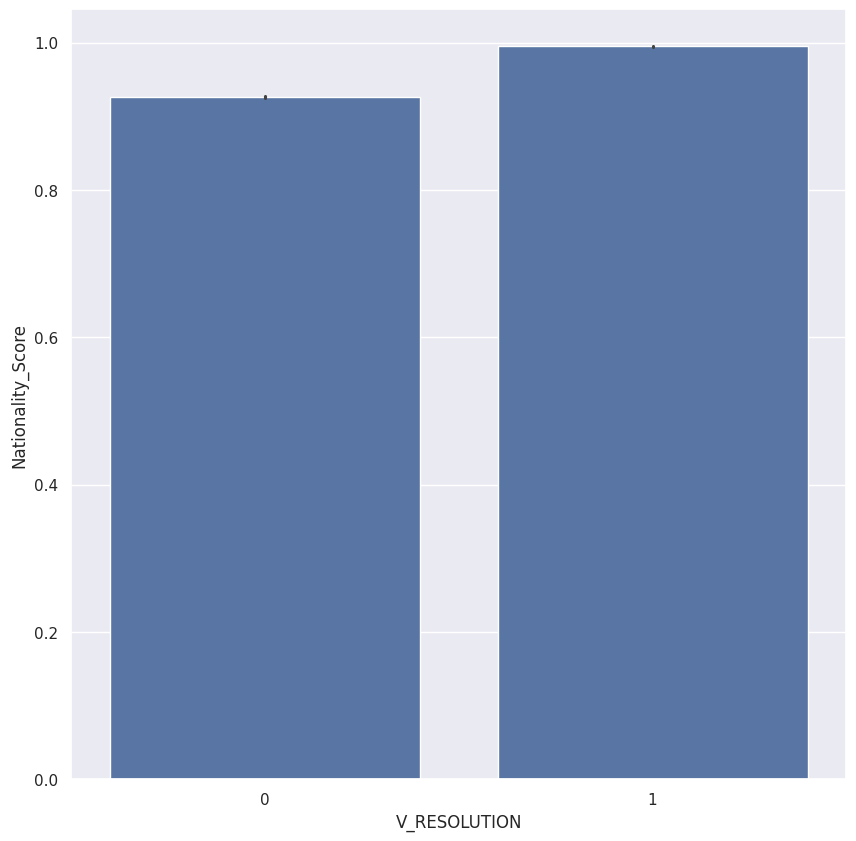

In [224]:
sns.barplot(x="V_RESOLUTION",y="Nationality_Score",data=df,errorbar=('ci', 95))

<Axes: xlabel='V_RESOLUTION', ylabel='ID_score'>

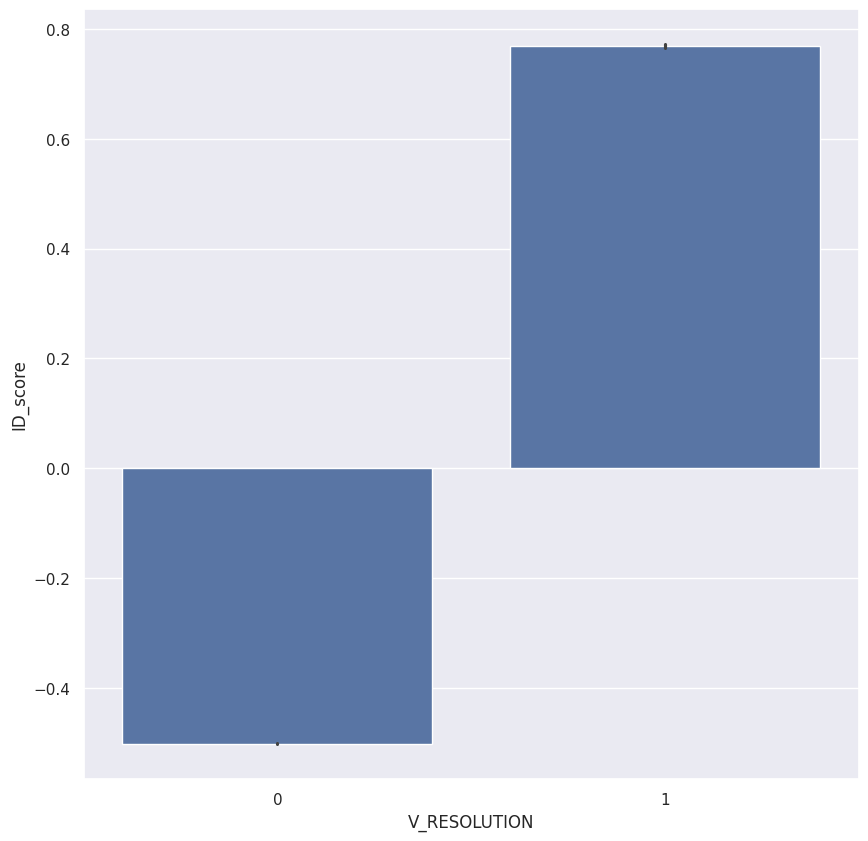

In [225]:
sns.barplot(x="V_RESOLUTION",y="ID_score",data=df,errorbar=('ci',95 ))

<Axes: xlabel='V_RESOLUTION', ylabel='NAME_MATCH_SCORE'>

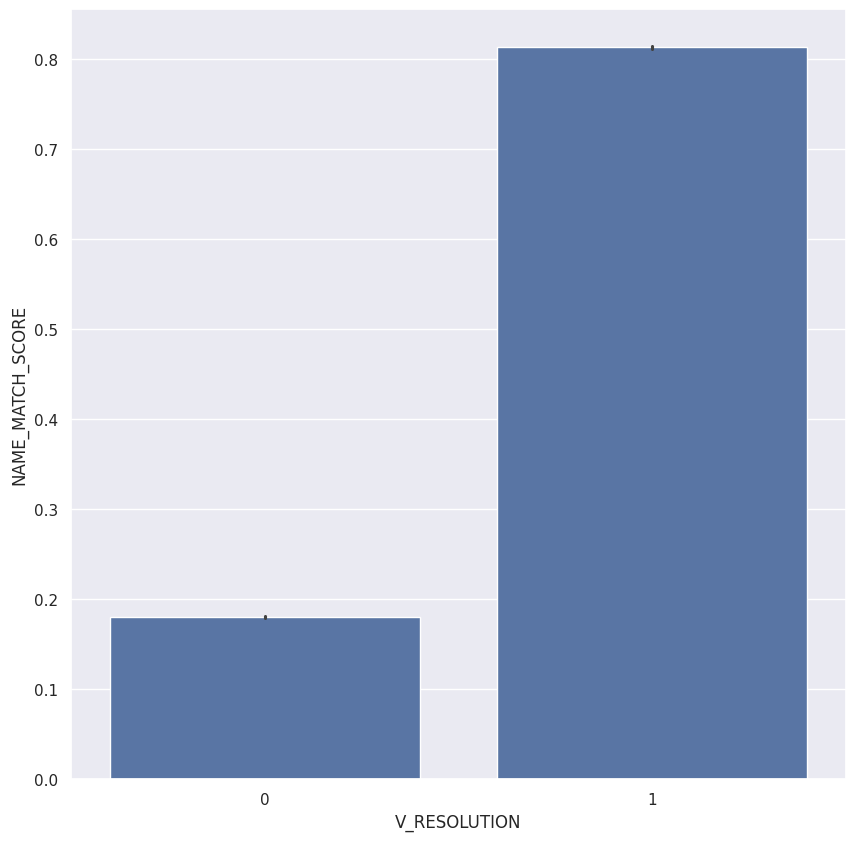

In [226]:
sns.barplot(x="V_RESOLUTION",y="NAME_MATCH_SCORE",data=df,errorbar=('ci', 95))

<Axes: xlabel='V_RESOLUTION', ylabel='Gender_Match_Score'>

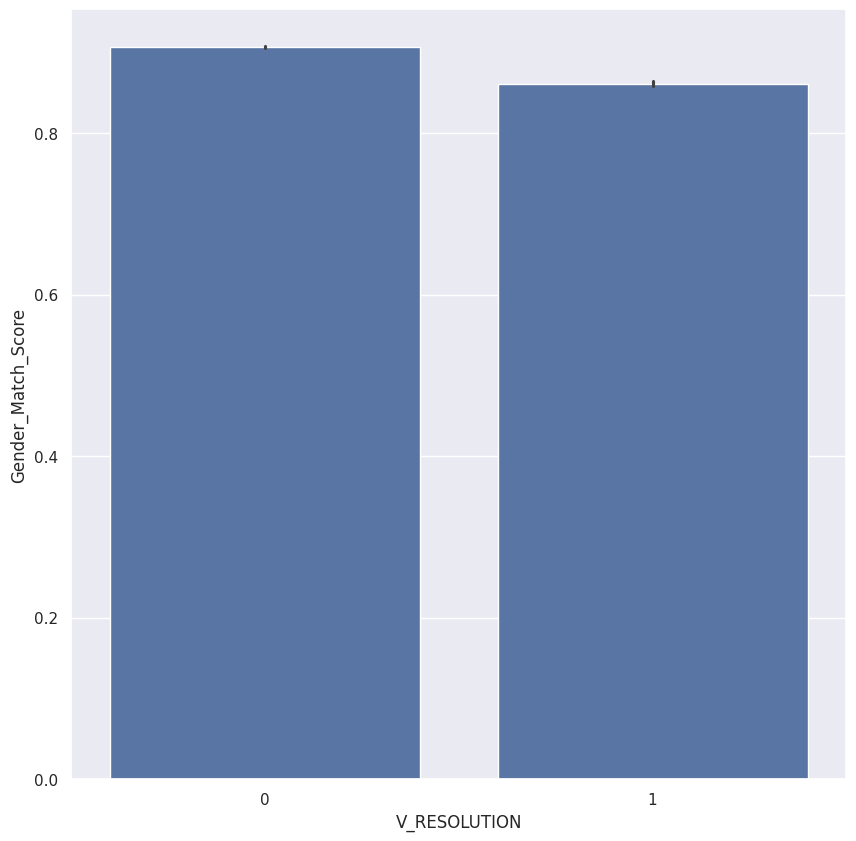

In [227]:
sns.barplot(x="V_RESOLUTION",y="Gender_Match_Score",data=df,errorbar=('ci', 95))

In [228]:
sns.__version__

'0.13.0'

Correlation

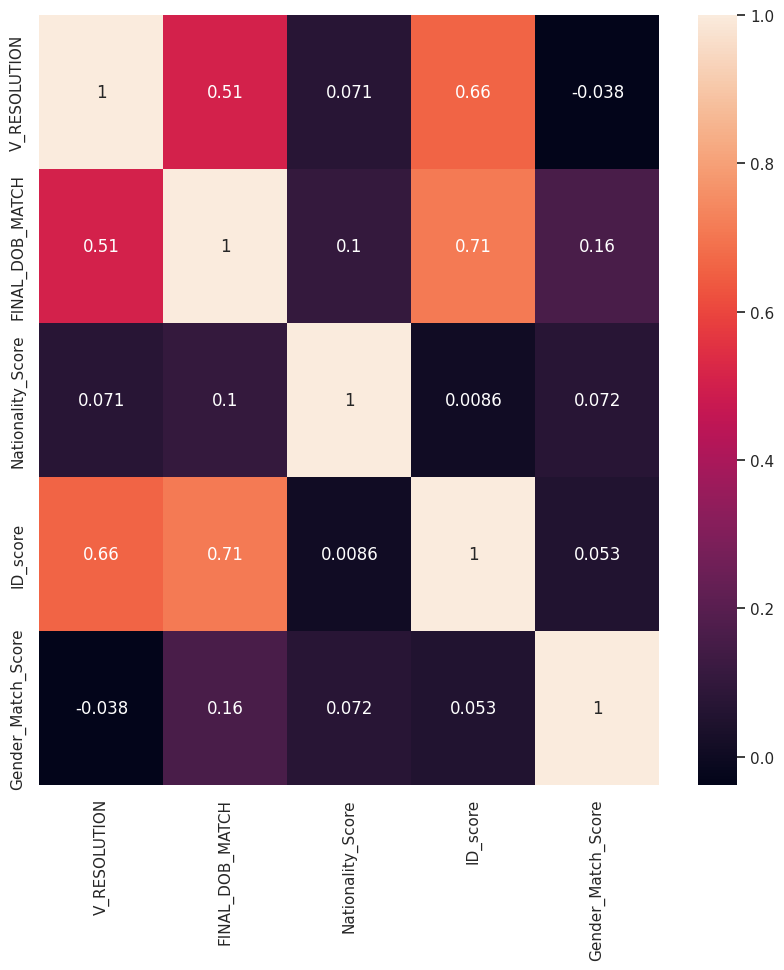

In [229]:
sns.heatmap(df[["V_RESOLUTION","FINAL_DOB_MATCH","Nationality_Score","ID_score","Gender_Match_Score"]].corr(),annot=True)
sns.set(font_scale=0.5)